---------------------------------------------------- **PREDICCIONES DE COSTES MÉDICOS** --------------------------------------------------------------

In [41]:
import numpy as np 
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, r2_score

**ANÁLISIS DESCRIPTIVO**

*ANÁLISIS EDA Y VISUALIZACIÓN DE LOS DATOS*

In [42]:
train_df = pd.read_csv('train.csv')
train_df = train_df.drop('id', 1)   # elimino id de train
test_df = pd.read_csv('test.csv')
train_df.head()
# age: edad del primer beneficiario del seguro
# sex: sexo del tomador del seguro
# bmi: índice de masa corporal
# children: número de hijos cubiertos por el seguro
# smoker: fumador
# región: área residencial del beneficiario del seguro
# charges: costos médicos cargados a la aseguradora

,age,sex,bmi,children,smoker,region,charges
0,58,male,30.305,0,no,northeast,11938.25595
1,54,female,28.880,2,no,northeast,12096.65120
2,64,female,39.700,0,no,southwest,14319.03100
3,27,female,25.175,0,no,northeast,3558.62025
4,60,female,27.550,0,no,northeast,13217.09450


In [43]:
test_df.head()

,id,age,sex,bmi,children,smoker,region
0,1319,39,female,26.315,2,no,northwest
1,12,23,male,34.400,0,no,southwest
2,487,19,male,28.700,0,no,southwest
3,1118,33,male,35.750,1,yes,southeast
4,460,49,female,36.630,3,no,southeast


In [44]:
train_df.shape       # 7 variables/columnas (sin contar id) (4 numéricas y 3 categóricas) y 936 filas

(936, 7)

In [45]:
train_df.describe()   # información de cada variable

,age,bmi,children,charges
count,936.000000,936.000000,936.000000,936.000000
mean,39.201923,30.483323,1.092949,13543.401938
std,13.978319,5.998443,1.194870,12285.440739
min,18.000000,16.815000,0.000000,1121.873900
25%,27.000000,26.125000,0.000000,4835.844225
50%,39.000000,30.250000,1.000000,9521.134300
75%,51.000000,34.210000,2.000000,17388.570550
max,64.000000,52.580000,5.000000,63770.428010


Se observa que la edad mínima y máxima se encuentran entre los 18 y 64 años respectivamente. 
El número de hijos cubiertos por el seguro está entre 0 y 5 hijos respectivamente.
Los costes médicos pueden oscilar entre 1,121.87 y 63,770.43 dólares respectivamente.
El índice de masa corporal oscila entre los 16.6 Kg/m2 y los 52.58 kg/m2 respectivamente. 

In [46]:
train_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [47]:
train_df.isnull().sum()  # comprobar que no hayan valores perdidos en el dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0.5, 1.0, 'Distribución de la variable Charges')

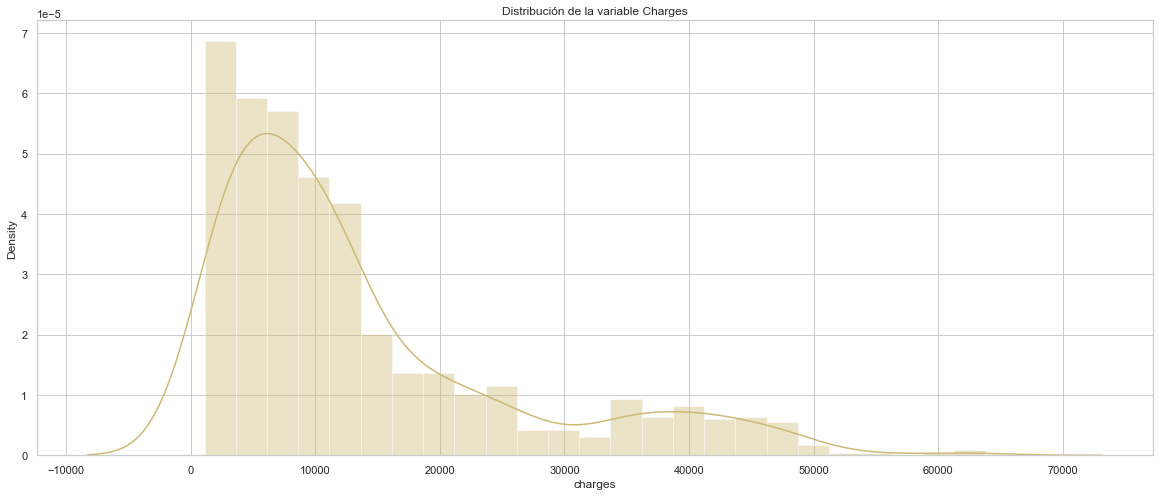

In [48]:
sns.set(style = 'whitegrid')
f, ax = plt.subplots(1,1, figsize=(20,8))
ax = sns.distplot(train_df['charges'], kde = True, color = 'y')
plt.title('Distribución de la variable Charges')

Tal y como se observa en la gráfica de distribución, la distribución está sesgada a la derecha. No obstante, para conseguir una gráfica que tenga una semejanza mayor a la N(0,1), se puede aplicar un logaritmo natural a esa variable, donde vemos que, efectivamente, los valores aparecen más concentrados y simétricos, con una distribución más parecida a la Normal.
A simple vista, se observa un poco de sesgo ya que hay algunas columnas en los extremos que sobresalen de la 'campana' de distribución límite que se asemeja a la normal.

Text(0.5, 1.0, 'Distribución de la variable Charges con logaritmo natural')

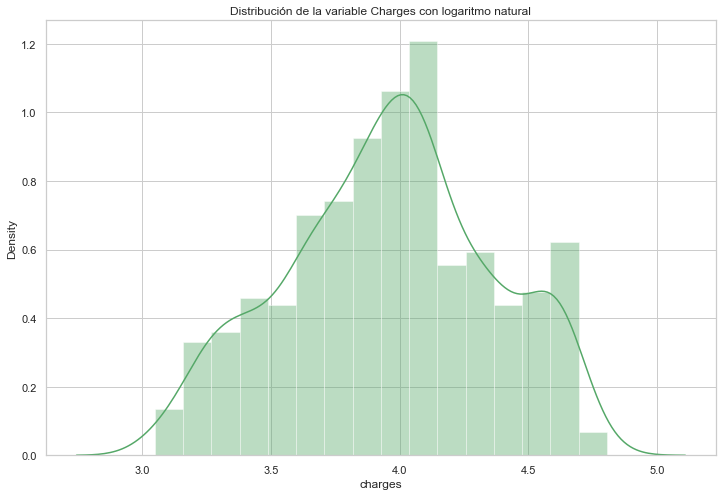

In [49]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.distplot(np.log10(train_df['charges']), kde = True, color = 'g')
plt.title('Distribución de la variable Charges con logaritmo natural')

Por poner algún ejemplo de los análisis disponibles con el dataset, voy a analizar los costes médicos por región y por región y fumadores.

Text(0.5, 1.0, 'Costos médicos por Región')

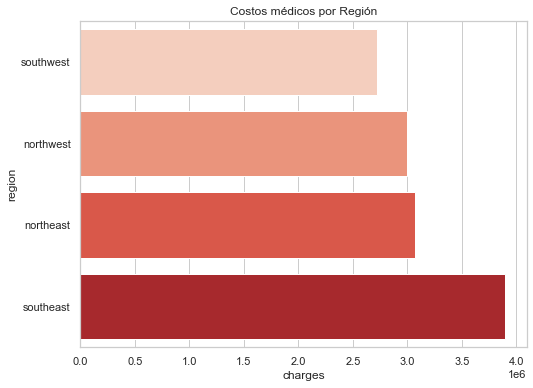

In [50]:
charges = train_df['charges']. groupby(train_df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1,1, figsize=(8,6))
ax = sns.barplot(charges.head(), charges.head().index, palette = 'Reds')
plt.title('Costos médicos por Región')

En general, los mayores gastos médicos cargados al Seguro se encuentran en la región 'sureste' y los más bajos en la región del 'suroste'.

Text(0.5, 1.0, 'Costos médicos por Región y Fumadores')

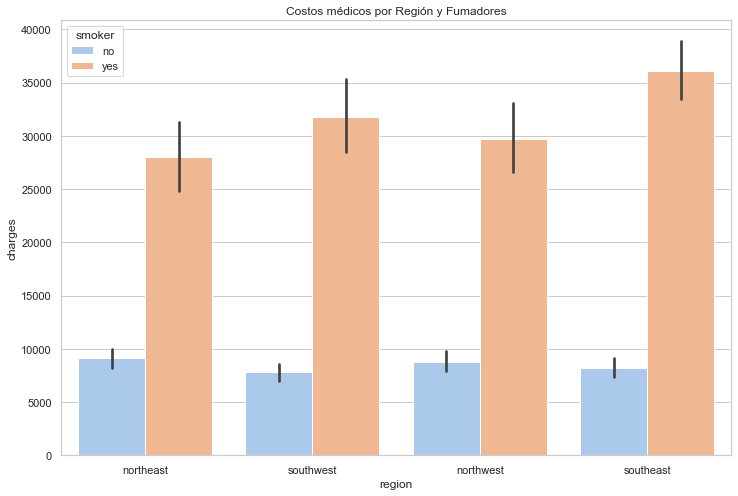

In [53]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x='region', y='charges', hue='smoker', data=train_df, palette='pastel')
plt.title('Costos médicos por Región y Fumadores')

Esta gráfica deja claramente expuesto que en todas las regiones, los gastos más elevados provienen de pacientes fumadores, siendo la región 'sureste' la de mayor incidencia (> 35,000 dólares).

Por último, la siguiente gráfica también es interesante analizarla ya que muestra los costos médicos teniendo en cuenta las variables BMI (masa corpórea) y condición de fumador. En este vemos que las personas que no fuman tienen un índice de masa corporal 'constante' y unos costes médicos más bajos. Mientras que los precios aumentan significativamente cuando los asegurados son fumadores.

Text(0.5, 1.0, 'Costos médicos por Masa Corporal y condición de Fumadores')

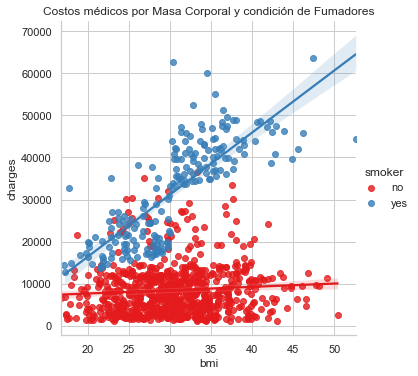

In [54]:
ax = sns.lmplot(x='bmi', y='charges', hue='smoker', data=train_df, palette='Set1')
plt.title('Costos médicos por Masa Corporal y condición de Fumadores')

Text(0.5, 1.0, 'Tabla de correlación entre las variables')

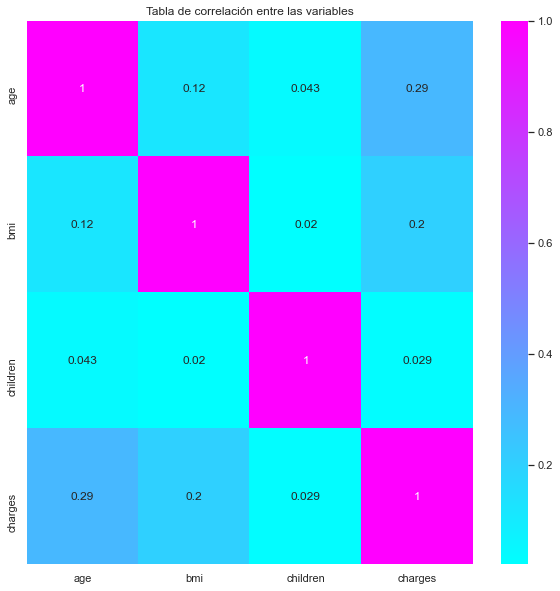

In [55]:
f, ax = plt.subplots(1,1, figsize=(10,10))
ax = sns.heatmap(train_df.corr(), annot=True, cmap='cool')
plt.title('Tabla de correlación entre las variables')

La tabla de correlación muestra, en general, correlaciones bajas y mayoritariamente positivas. La correlación más alta entre las correlaciones bajas/débiles que se observan (0.29) la presentan las variables charges/age.
Más adelante se observa como queda la correlación una vez realizado el preprocesamiento de LabelEncoder.

**CONVIERTO VARIABLES CATEGÓRICAS EN ETIQUETAS pata train y para test**

In [56]:
train_df[['sex', 'smoker', 'region']] = train_df[['sex', 'smoker', 'region']].astype('category')
train_df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [57]:
test_df[['sex', 'smoker', 'region']] = test_df[['sex', 'smoker', 'region']].astype('category')
test_df.dtypes

id             int64
age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
dtype: object

**CONVIERTO LAS VARIABLES CATEGÓRICAS EN VARIABLES NUMÉRICAS para train y para test**

In [58]:
from sklearn.preprocessing import LabelEncoder
# PARA TRAIN
label = LabelEncoder()
label.fit(train_df.sex.drop_duplicates())
train_df.sex = label.transform(train_df.sex)
label.fit(train_df.smoker.drop_duplicates())
train_df.smoker = label.transform(train_df.smoker)
label.fit(train_df.region.drop_duplicates())
train_df.region = label.transform(train_df.region)
train_df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [59]:
# PARA TEST
label.fit(test_df.sex.drop_duplicates())
test_df.sex = label.transform(test_df.sex)
label.fit(test_df.smoker.drop_duplicates())
test_df.smoker = label.transform(test_df.smoker)
label.fit(test_df.region.drop_duplicates())
test_df.region = label.transform(test_df.region)
test_df.dtypes

id            int64
age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
dtype: object

Text(0.5, 1.0, 'Tabla de correlación entre las variables')

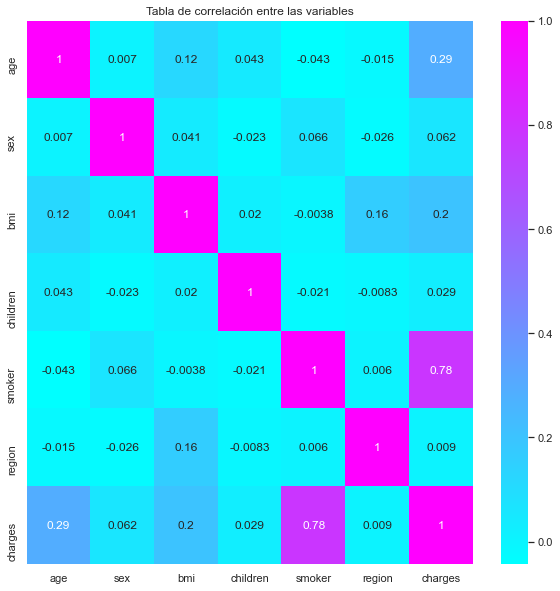

In [60]:
f, ax = plt.subplots(1,1, figsize=(10,10))
ax = sns.heatmap(train_df.corr(), annot=True, cmap='cool')
plt.title('Tabla de correlación entre las variables')

En la tabla se puede observar que las correlaciones entre variables son en su mayoría bajas y toman valores positivos y negativos. Con respecto a los valores anteriores, las variables smoker/charges presentan el valor más alto (0.78), pero es debido al proceso de LabelEncoder llevado a cabo.
A diferencia de la anterior tabla de correlación esta presenta más variables ya que ahora se han pasado las variables categóricas a numéricas. Por ello, algunas correlaciones pierden significatividad real.

In [63]:
train_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,58,1,30.305,0,0,0,11938.25595
1,54,0,28.880,2,0,0,12096.65120
2,64,0,39.700,0,0,3,14319.03100
3,27,0,25.175,0,0,0,3558.62025
4,60,0,27.550,0,0,0,13217.09450
5,33,1,35.245,0,0,0,12404.87910
6,40,1,32.300,2,0,1,6986.69700
7,21,0,34.600,0,0,3,2020.17700
8,62,1,32.015,0,1,0,45710.20785
9,19,0,25.745,1,0,1,2710.82855


Una vez convertidas las variables categóricas en numéricas, algunas variables como 'sex' y 'smoker' pasar a ser variables binarias, tomando valores 0 (0= mujer y no smoker) y 1 (1 = hombre y smoker). Las variables binarias son conocidas en regresión como variables artificiales o ficticias y miden el efecto de alguna X sobre la variable Y según la característica (sex y smoker). Además, al existir más de una variable independiente a predecir estamos ante una regresión múltiple.

Por lo tanto, la regresión quedaría de la siguiente forma: 
 
Charges(Y) = β0 + β1AGE + **β2HOM** + β3BMI + β4CHILDREN + **β5SMOKER** + β6REGION

Es importante tener claro si hay variables artificiles o no en la regresión para interpretar adecuadamente los coeficientes obtenidos.

Por último, en vista de que buscamos el modelo más adecuado y que se tienen dos variables binarias, sería interesante realizar un Contraste/Test de Chow para observar si vale la pena ditinguir por sexo y fumadores, y, estimar una única regresión (como se hace a continuación) o, por lo contrario, más de una. 


**ANÁLISIS PREDICTIVO CON SOLUCIÓN PARA MACHINE LEARNING**

*REGRESIÓN LINEAL MÚLTIPLE*

In [64]:
# ENTRENAMIENTO
x = train_df.drop(['charges'], axis= 1)  # elimino la variable charges de X
y = train_df['charges']                  # y la paso a la variable Y
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.3, random_state=0)
ln = LinearRegression()
RL = ln.fit(x, y)

print('Constante:', ln.intercept_)
print('Betas:', ln.coef_)
print('r_cuadrado:', ln.score(x_test, y_test))

Constante: -12878.232622618747
Betas: [  270.33972256    26.01948286   348.91127025   303.58350798
 23754.01188298  -208.16089326]
r_cuadrado: 0.7644164126293902


Charges(Y) = -12,878.23 + 270.34AGE + **26.02HOM** + 348.91BMI + 303.58CHILDREN + **23,754.01SMOKER** - 208.16REGION

Valor 1 = b0+b2 + b1 + b3 + b4 + b5+b1 - b6 --> hombre fumador

Valor 0 = b0 + b1 + b3 + b4 + b1+b5 - b6  --> mujer fumadora

La interpretación de los coeficientes con variable artificial es la siguiente: 

La **constante(β0)** es la parte de CHARGES que no depende del resto de variables pero que indican la diferencia entre sexos y fumadores, es decir, mujer no fumadora.

Si aumenta en 1 unidad cualquiera de las variables que se han tenido en cuenta en el modelo (age, children...), el costo médico (charges) sube en X cantidad de dólares en dependencia de las variables artificiales. Salvo para el último coeficiente, que es negativo. Indicando que si esa variable aumenta en 1 unidad el costo médico disminuye en 208 dólares (en dependencia de las variables artificiales).

El coeficiente de determinación o r_cuadrado alcanzado para este modelo es de 0.76... lo que significa que el modelo explica (o se ajusta) en un 76% a la variabilidad de los datos de respuesta entorno a su media.
De todas formas, aunque el r_cuadrado tiene un valor elevado, es importante tener en cuenta que esta medida no indica si un modelo de regresión es adecuado.

In [467]:
# PREDICCIÓN para Train
y_hat = ln.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))    # diferencia entre valor real y aproximado
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat)) # cuantifica cuánto de diferente es un conjunto de datos
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print('Coef. of determination:', r2_score(y_test, y_hat))

Mean Absolute Error: 4248.736641496005
Mean Squared Error: 34890505.78636214
Root Mean Squared Error: 5906.818584175591
Coef. of determination: 0.7644164126293902


In [14]:
ids = test_df['id']         # elimino la columna id
X_test = test_df.drop('id', 1)

X_test.head()

,age,sex,bmi,children,smoker,region
0,39,0,26.315,2,0,1
1,23,1,34.400,0,0,3
2,19,1,28.700,0,0,3
3,33,1,35.750,1,1,2
4,49,0,36.630,3,0,2


In [470]:
# PREDICCIÓN PARA TEST
y_pred = ln.predict(X_test)
result = np.vstack([ids, y_pred]).T
df = pd.DataFrame(result)
df = df.astype({0: 'int32'})

df.to_csv('predicción.csv', header=['id', train_df.columns.values[-1]], index=False)

*REGRESIÓN RIDGE*

In [471]:
from sklearn.linear_model import Ridge
#ENTRENAMIENTO
rdg = Ridge(alpha=0.5)
rdg_model = rdg.fit(x, y)

print('Constante:', rdg.intercept_)
print('Betas:', rdg.coef_)
print('r_cuadrado:', rdg.score(x_test, y_test))

Constante: -12859.571331532898
Betas: [  270.24538658    30.03471321   348.89236595   303.00547145
 23679.0361997   -207.86308331]
r_cuadrado: 0.7643041128378312


In [472]:
# PREDICCIÓN
y_hat = rdg_model.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print('Coef. of determination:', r2_score(y_test, y_hat))

Mean Absolute Error: 4256.025032560298
Mean Squared Error: 34907137.66030094
Root Mean Squared Error: 5908.226270235505
Coef. of determination: 0.7643041128378312


In [473]:
# PREDICCIÓN PARA TEST
y_pred1 = rdg_model.predict(X_test)
result1 = np.vstack([ids, y_pred1]).T
df = pd.DataFrame(result1)
df = df.astype({0: 'int32'})

df.to_csv('predicción1.csv', header=['id', train_df.columns.values[-1]], index=False)

*REGRESIÓN LASSO*

In [474]:
from sklearn.linear_model import Lasso
#ENTRENAMIENTO
lss = Lasso(alpha=0.2)
lss_model = lss.fit(x, y)

print('Constante:', lss.intercept_)
print('Betas:', lss.coef_)
print('r_cuadrado:', lss.score(x_test, y_test))

Constante: -12877.415942349115
Betas: [  270.33861341    25.28566417   348.90388891   303.43047225
 23752.87870621  -207.9979796 ]
r_cuadrado: 0.7644143408508687


In [475]:
# PREDICCIÓN
y_hat = lss_model.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print('Coef. of determination:', r2_score(y_test, y_hat))

Mean Absolute Error: 4248.85927688319
Mean Squared Error: 34890812.62183104
Root Mean Squared Error: 5906.844557107545
Coef. of determination: 0.7644143408508687


In [476]:
# PREDICCIÓN PARA TEST
y_pred2 = lss_model.predict(X_test)
result2 = np.vstack([ids, y_pred2]).T
df = pd.DataFrame(result2)
df = df.astype({0: 'int32'})

df.to_csv('predicción2.csv', header=['id', train_df.columns.values[-1]], index=False)

Hasta el momento, el modelo que presenta menos error es la regresión lineal, aunque, los valores obtenidos en la regresión lineal y lasso son casi iguales. Por lo tanto, son los modelos que más se ajustan.
Sin embargo, al realizar la regresión Random Forest obtengo el error más bajo y el ajuste más alto entre las demás, lo que lo convierte en el mejor modelo.

*REGRESIÓN RANDOM FOREST*

In [477]:
from sklearn.ensemble import RandomForestRegressor as rfr
# ENTRENAMIENTO
Rfr = rfr(n_estimators=100, criterion='mse', random_state=1, n_jobs=-1)
rfr_model = Rfr.fit(x,y)
x_train_pred = Rfr.predict(x)
x_test_pred = Rfr.predict(x_test)

print('MSE train data:', metrics.mean_squared_error(x_train_pred, y))
print('MSE test data:', metrics.mean_squared_error(x_test_pred, y_test))

print('R2 train data:', r2_score(y, x_train_pred, y))
print('R2 test data:', r2_score(y_test, x_test_pred, y_test))

MSE train data: 3603555.6947295503
MSE test data: 3278173.774662225
R2 train data: 0.9720896309405037
R2 test data: 0.975648061472254


In [478]:
# PREDICCIÓN
y_hat = rfr_model.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print('Coef. of determination:', r2_score(y_test, y_hat))

Mean Absolute Error: 1018.5255868999997
Mean Squared Error: 3278173.7746622246
Root Mean Squared Error: 1810.5727753012925
Coef. of determination: 0.9778654989243221


In [479]:
# PREDICCIÓN PARA TEST
y_pred3 = rfr_model.predict(X_test)
result3 = np.vstack([ids, y_pred3]).T
df = pd.DataFrame(result3)
df = df.astype({0: 'int32'})

df.to_csv('predicción3.csv', header=['id', train_df.columns.values[-1]], index=False)

**PREDICCIONES DE CHARGES**  *(Salida Machine Learning)*

La siguiente tabla de predicciones futuras muestra los 'futuros costes médicos' en los que incurrirá la aseguradora. He usado el modelo Random Forest para hacer los calculos ya que es el modelo con mayor ajuste. En el extracto de la tabla podemos ver que los costes médicos de algunos pacientes aumentan y en otros disminuyen.

In [480]:
# PREDICCIÓN FUTURA CON LA REGRESIÓN RANDOM FOREST
y_test_hat = Rfr.predict(x_test)
df = pd.DataFrame({'Coste Actual': y_test, 'Coste Predicho': y_test_hat})
df

,Coste Actual,Coste Predicho
825,8302.53565,10335.211319
236,6238.29800,6351.434930
803,5630.45785,5535.823785
767,16297.84600,16621.678794
266,20462.99766,18513.148958
...,...,...
71,43921.18370,44278.366487
49,2727.39510,2735.549679
934,1880.48700,3412.688277
350,12032.32600,13732.384983


Finalmente, he probado las regresiones Lineal, Ridge, Lasso y Random Forest (no estoy muy segura de que esté bien) para obtener el mejor r_cuadrado posible. En este caso, la que me ofrece un resultado mayor (con vista a la competición en Kaggle) es la regresión RandomForest, que destaca por encima de las otras que ofrecen un ajuste de 0.76 diferenciándose solo en decimales, mientras que con esta última el ajuste sube 21 puntos (0,97). 
No obstante, me parece interesante tener en cuenta el valor de los coeficientes hallados en estas cuatro regresiones desde un punto de vista económico. 
Dado que el coste médico aumenta o decrece en función del valor obtenido, se puede concluir que el hospital se verá favorecido en un modelo donde los coeficientes de las betas sean más elevados y la aseguradora se beneficia del modelo con los coeficientes más bajos ya que paga menos. Analizando los modelos calculados, se observa que están bastante balanceados y que no favorecen o perjudican a ninguna de las partes. 

**ANÁLISIS PREDICTIVO CON SOLUCIÓN PARA DEEP LEARNING**

In [18]:
from sklearn.model_selection import GridSearchCV
import tensorflow as tf   
from tensorflow.keras.models import Sequential                         
from tensorflow.keras import optimizers                                             
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasRegressor

*RED NEURONAL DENSA*

Las redes neuronales Densas son aquellas redes en las que todas las neuronas de una capa están conectadas a todas las neuronas de la siguiente. Son más eficaces en cuanto al tratamiento de información porque cada neurona dispone de más datos para tratar.

***Primer modelo*** *(igual al ejemplo de apoyo)*

In [500]:
def neural_network(neuronas_capa_1 = 25, neuronas_capa_2 = 15):
    neural_net = Sequential()
    neural_net.add(Dense(neuronas_capa_1, input_dim=x.shape[1], activation='relu'))
    neural_net.add(Dense(neuronas_capa_2, activation='relu'))
    neural_net.add(Dense(1, activation='linear'))
# La función ReLU transforma los valores introducidos anulando los valores negativos y dejando los positivos tal y como entran.
# La función linear devuelve lo que obtiene como entrada
    neural_net.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return neural_net

neu_net = KerasRegressor(build_fn=neural_network, epochs = 50)

parameters = {'neuronas_capa_1':[25, 50, 10], 'neuronas_capa_2':[25, 50, 10], 'batch_size':[20, 30]}

cv = GridSearchCV(neu_net, parameters, refit=True, scoring='r2', verbose= 3)
# GridSearchCV es una clase disponible en scikit-learn que permite evaluar y seleccionar de forma sistemática los
# parámetros de un modelo. Indicándole un modelo y los parámetros a probar, puede evaluar el rendimiento del primero 
# en función de los segundos mediante validación cruzada.
cv.fit(x, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Epoch 1/50
38/38 [==============================] - 2s 6ms/step - loss: 340989856.0000 - mae: 13743.9053
Epoch 2/50
38/38 [==============================] - 0s 5ms/step - loss: 340172928.0000 - mae: 13716.2363
Epoch 3/50
38/38 [==============================] - 0s 5ms/step - loss: 339001600.0000 - mae: 13675.8906
Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 336961856.0000 - mae: 13606.8223
Epoch 5/50
38/38 [==============================] - 0s 6ms/step - loss: 333535168.0000 - mae: 13490.2451
Epoch 6/50
38/38 [==============================] - 0s 5ms/step - loss: 328271584.0000 - mae: 13306.4697
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 320893536.0000 - mae: 13039.0244
Epoch 8/50
38/38 [==============================] - 0s 5ms/step - loss: 310892608.0000 - mae: 12686.3438
Epoch 9/50
38/38 [==============================] - 0s 5ms/step - loss: 298642464.0000 - mae: 12212

38/38 [==============================] - 0s 6ms/step - loss: 132684872.0000 - mae: 9418.9639
[CV 3/5] END batch_size=20, neuronas_capa_1=25, neuronas_capa_2=25; total time=  12.7s
Epoch 1/50
38/38 [==============================] - 1s 5ms/step - loss: 324452448.0000 - mae: 13332.0146
Epoch 2/50
38/38 [==============================] - 0s 5ms/step - loss: 323412384.0000 - mae: 13295.8174
Epoch 3/50
38/38 [==============================] - 0s 5ms/step - loss: 321349952.0000 - mae: 13222.7568
Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 317403616.0000 - mae: 13080.4834
Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 310555584.0000 - mae: 12837.9678
Epoch 6/50
38/38 [==============================] - 0s 5ms/step - loss: 300345600.0000 - mae: 12459.5977
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 286484000.0000 - mae: 11921.9062
Epoch 8/50
38/38 [==============================] - 0s 5ms/step - loss: 269076480.000

Epoch 25/50
38/38 [==============================] - 0s 7ms/step - loss: 134001544.0000 - mae: 9259.9111
Epoch 26/50
38/38 [==============================] - 0s 7ms/step - loss: 133859424.0000 - mae: 9233.1777
Epoch 27/50
38/38 [==============================] - 0s 6ms/step - loss: 133813840.0000 - mae: 9244.9707
Epoch 28/50
38/38 [==============================] - 0s 7ms/step - loss: 133714912.0000 - mae: 9223.5205
Epoch 29/50
38/38 [==============================] - 0s 7ms/step - loss: 133662096.0000 - mae: 9208.9316
Epoch 30/50
38/38 [==============================] - 0s 6ms/step - loss: 133604080.0000 - mae: 9268.7129: 0s - loss: 129602048.0000 - mae: 9146.28
Epoch 31/50
38/38 [==============================] - 0s 6ms/step - loss: 133547888.0000 - mae: 9229.8057
Epoch 32/50
38/38 [==============================] - 0s 7ms/step - loss: 133460752.0000 - mae: 9296.4893: 0s - loss: 134333712.0000 - mae: 9229.
Epoch 33/50
38/38 [==============================] - 0s 6ms/step - loss: 13340

Epoch 1/50
38/38 [==============================] - 1s 5ms/step - loss: 328462848.0000 - mae: 13285.7393
Epoch 2/50
38/38 [==============================] - 0s 5ms/step - loss: 326942336.0000 - mae: 13231.9170
Epoch 3/50
38/38 [==============================] - 0s 5ms/step - loss: 323669856.0000 - mae: 13118.5381
Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 316852288.0000 - mae: 12870.4551
Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 304710752.0000 - mae: 12435.0029
Epoch 6/50
38/38 [==============================] - 0s 6ms/step - loss: 286691552.0000 - mae: 11744.6572
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 262828512.0000 - mae: 10800.6680
Epoch 8/50
38/38 [==============================] - 0s 5ms/step - loss: 234970624.0000 - mae: 9684.9473
Epoch 9/50
38/38 [==============================] - 0s 5ms/step - loss: 205991456.0000 - mae: 8663.0820
Epoch 10/50
38/38 [==============================] - 0s 6

38/38 [==============================] - 0s 5ms/step - loss: 327159200.0000 - mae: 13300.9863
Epoch 4/50
38/38 [==============================] - 0s 6ms/step - loss: 320203264.0000 - mae: 13053.7314
Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 307332384.0000 - mae: 12585.9951
Epoch 6/50
38/38 [==============================] - 0s 6ms/step - loss: 287574080.0000 - mae: 11828.3770
Epoch 7/50
38/38 [==============================] - 0s 6ms/step - loss: 260994320.0000 - mae: 10779.2119
Epoch 8/50
38/38 [==============================] - 0s 6ms/step - loss: 229273424.0000 - mae: 9542.7119
Epoch 9/50
38/38 [==============================] - 0s 5ms/step - loss: 196578048.0000 - mae: 8415.8135
Epoch 10/50
38/38 [==============================] - 0s 5ms/step - loss: 168882176.0000 - mae: 7793.8940
Epoch 11/50
38/38 [==============================] - 0s 5ms/step - loss: 149938640.0000 - mae: 7868.1851
Epoch 12/50
38/38 [==============================] - 0s 5ms/step - l

38/38 [==============================] - 0s 5ms/step - loss: 336607392.0000 - mae: 13592.9121
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 331962272.0000 - mae: 13428.3086
Epoch 8/50
38/38 [==============================] - 0s 5ms/step - loss: 325064000.0000 - mae: 13182.7021
Epoch 9/50
38/38 [==============================] - 0s 5ms/step - loss: 315807136.0000 - mae: 12853.9121
Epoch 10/50
38/38 [==============================] - 0s 5ms/step - loss: 304171904.0000 - mae: 12417.0410
Epoch 11/50
38/38 [==============================] - 0s 5ms/step - loss: 290214656.0000 - mae: 11892.5557
Epoch 12/50
38/38 [==============================] - 0s 5ms/step - loss: 274352096.0000 - mae: 11294.4287
Epoch 13/50
38/38 [==============================] - 0s 5ms/step - loss: 257082576.0000 - mae: 10652.1553
Epoch 14/50
38/38 [==============================] - 0s 5ms/step - loss: 239194784.0000 - mae: 9987.7344
Epoch 15/50
38/38 [==============================] - 0s 5ms/st

38/38 [==============================] - 0s 6ms/step - loss: 244995536.0000 - mae: 10187.0381
Epoch 9/50
38/38 [==============================] - 0s 6ms/step - loss: 213228208.0000 - mae: 9037.6514
Epoch 10/50
38/38 [==============================] - 0s 6ms/step - loss: 183587664.0000 - mae: 8230.6621: 0s - loss: 190304144.0000 - mae: 8480.
Epoch 11/50
38/38 [==============================] - 0s 6ms/step - loss: 161280176.0000 - mae: 7960.0288
Epoch 12/50
38/38 [==============================] - 0s 5ms/step - loss: 147519936.0000 - mae: 8317.2461
Epoch 13/50
38/38 [==============================] - 0s 6ms/step - loss: 140015072.0000 - mae: 8743.3438
Epoch 14/50
38/38 [==============================] - 0s 5ms/step - loss: 137036272.0000 - mae: 9085.1826
Epoch 15/50
38/38 [==============================] - 0s 5ms/step - loss: 135934624.0000 - mae: 9287.0938
Epoch 16/50
38/38 [==============================] - 0s 5ms/step - loss: 135504400.0000 - mae: 9369.8447
Epoch 17/50
38/38 [========

38/38 [==============================] - 0s 5ms/step - loss: 309514592.0000 - mae: 12799.6836
Epoch 6/50
38/38 [==============================] - 0s 5ms/step - loss: 297087424.0000 - mae: 12335.9189
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 279429632.0000 - mae: 11643.1309
Epoch 8/50
38/38 [==============================] - 0s 5ms/step - loss: 256681680.0000 - mae: 10726.9824
Epoch 9/50
38/38 [==============================] - 0s 5ms/step - loss: 229843504.0000 - mae: 9705.0000
Epoch 10/50
38/38 [==============================] - 0s 6ms/step - loss: 201037216.0000 - mae: 8651.5381
Epoch 11/50
38/38 [==============================] - 0s 5ms/step - loss: 174459456.0000 - mae: 7925.0361
Epoch 12/50
38/38 [==============================] - 0s 5ms/step - loss: 153790304.0000 - mae: 7631.7656: 0s - loss: 149712928.0000 - mae: 7421.50
Epoch 13/50
38/38 [==============================] - 0s 5ms/step - loss: 140710544.0000 - mae: 7882.4922
Epoch 14/50
38/38 [======

38/38 [==============================] - 0s 5ms/step - loss: 250395760.0000 - mae: 10314.0264A: 0s - loss: 250395760.0000 - mae: 10314.026
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 211342768.0000 - mae: 8860.0049
Epoch 8/50
38/38 [==============================] - 0s 5ms/step - loss: 175603200.0000 - mae: 7808.7739
Epoch 9/50
38/38 [==============================] - 0s 5ms/step - loss: 150653504.0000 - mae: 7717.1294
Epoch 10/50
38/38 [==============================] - 0s 5ms/step - loss: 138762688.0000 - mae: 8403.7393
Epoch 11/50
38/38 [==============================] - 0s 5ms/step - loss: 134538272.0000 - mae: 8847.9619
Epoch 12/50
38/38 [==============================] - 0s 5ms/step - loss: 133598432.0000 - mae: 9077.8594
Epoch 13/50
38/38 [==============================] - 0s 5ms/step - loss: 133430560.0000 - mae: 9214.0645
Epoch 14/50
38/38 [==============================] - 0s 5ms/step - loss: 133283488.0000 - mae: 9307.8340
Epoch 15/50
38/38 [=====

38/38 [==============================] - 0s 6ms/step - loss: 199068464.0000 - mae: 8358.5312
Epoch 9/50
38/38 [==============================] - 0s 5ms/step - loss: 169802144.0000 - mae: 7656.7739
Epoch 10/50
38/38 [==============================] - 0s 5ms/step - loss: 149955136.0000 - mae: 7773.4868
Epoch 11/50
38/38 [==============================] - 0s 6ms/step - loss: 139596816.0000 - mae: 8343.9463
Epoch 12/50
38/38 [==============================] - 0s 5ms/step - loss: 135767520.0000 - mae: 8782.0996
Epoch 13/50
38/38 [==============================] - 0s 6ms/step - loss: 134744976.0000 - mae: 9067.6152
Epoch 14/50
38/38 [==============================] - 0s 6ms/step - loss: 134488240.0000 - mae: 9215.7373
Epoch 15/50
38/38 [==============================] - 0s 5ms/step - loss: 134316832.0000 - mae: 9244.4873
Epoch 16/50
38/38 [==============================] - 0s 6ms/step - loss: 134174960.0000 - mae: 9232.9053: 0s - loss: 130054640.0000 - mae: 9188.
Epoch 17/50
38/38 [=========

38/38 [==============================] - 0s 5ms/step - loss: 310288704.0000 - mae: 12652.2109A: 0s - loss: 310181504.0000 - mae: 12739.239
Epoch 8/50
38/38 [==============================] - 0s 5ms/step - loss: 293097088.0000 - mae: 12000.5791
Epoch 9/50
38/38 [==============================] - 0s 5ms/step - loss: 272370592.0000 - mae: 11210.3418
Epoch 10/50
38/38 [==============================] - 0s 5ms/step - loss: 249022224.0000 - mae: 10310.6045
Epoch 11/50
38/38 [==============================] - 0s 6ms/step - loss: 224364816.0000 - mae: 9397.4697
Epoch 12/50
38/38 [==============================] - 0s 5ms/step - loss: 200559680.0000 - mae: 8610.3975
Epoch 13/50
38/38 [==============================] - 0s 5ms/step - loss: 179461936.0000 - mae: 8042.2358
Epoch 14/50
38/38 [==============================] - 0s 5ms/step - loss: 162741664.0000 - mae: 7869.0679
Epoch 15/50
38/38 [==============================] - 0s 5ms/step - loss: 150779440.0000 - mae: 8033.9253
Epoch 16/50
38/38 [=

38/38 [==============================] - 0s 6ms/step - loss: 309502112.0000 - mae: 12623.8867
Epoch 9/50
38/38 [==============================] - 0s 5ms/step - loss: 297508000.0000 - mae: 12156.5029
Epoch 10/50
38/38 [==============================] - 0s 5ms/step - loss: 283199264.0000 - mae: 11611.0078
Epoch 11/50
38/38 [==============================] - 0s 5ms/step - loss: 267272592.0000 - mae: 11006.6152
Epoch 12/50
38/38 [==============================] - 0s 6ms/step - loss: 250241984.0000 - mae: 10364.4844
Epoch 13/50
38/38 [==============================] - 0s 5ms/step - loss: 232158064.0000 - mae: 9694.8369
Epoch 14/50
38/38 [==============================] - 0s 5ms/step - loss: 214356576.0000 - mae: 9087.6826
Epoch 15/50
38/38 [==============================] - 0s 5ms/step - loss: 197327936.0000 - mae: 8566.3037
Epoch 16/50
38/38 [==============================] - 0s 6ms/step - loss: 181938112.0000 - mae: 8170.6899
Epoch 17/50
38/38 [==============================] - 0s 6ms/ste

38/38 [==============================] - 0s 5ms/step - loss: 310536896.0000 - mae: 12837.4590
Epoch 9/50
38/38 [==============================] - 0s 6ms/step - loss: 303042720.0000 - mae: 12565.7607
Epoch 10/50
38/38 [==============================] - 0s 5ms/step - loss: 293377088.0000 - mae: 12200.8643
Epoch 11/50
38/38 [==============================] - 0s 5ms/step - loss: 281610720.0000 - mae: 11749.3301
Epoch 12/50
38/38 [==============================] - 0s 6ms/step - loss: 267912240.0000 - mae: 11213.6787
Epoch 13/50
38/38 [==============================] - 0s 5ms/step - loss: 252847136.0000 - mae: 10602.5068
Epoch 14/50
38/38 [==============================] - 0s 5ms/step - loss: 236853440.0000 - mae: 9953.9717
Epoch 15/50
38/38 [==============================] - 0s 6ms/step - loss: 220579168.0000 - mae: 9285.9463
Epoch 16/50
38/38 [==============================] - 0s 5ms/step - loss: 204269808.0000 - mae: 8670.2568
Epoch 17/50
38/38 [==============================] - 0s 6ms/st

38/38 [==============================] - 0s 5ms/step - loss: 134093632.0000 - mae: 9293.3428
Epoch 35/50
38/38 [==============================] - 0s 6ms/step - loss: 133994112.0000 - mae: 9287.4297
Epoch 36/50
38/38 [==============================] - 0s 5ms/step - loss: 133950336.0000 - mae: 9285.5449
Epoch 37/50
38/38 [==============================] - 0s 6ms/step - loss: 133949736.0000 - mae: 9259.9170
Epoch 38/50
38/38 [==============================] - 0s 5ms/step - loss: 133862424.0000 - mae: 9277.6533
Epoch 39/50
38/38 [==============================] - 0s 5ms/step - loss: 133842528.0000 - mae: 9308.9805
Epoch 40/50
38/38 [==============================] - 0s 6ms/step - loss: 133791592.0000 - mae: 9312.5225
Epoch 41/50
38/38 [==============================] - 0s 5ms/step - loss: 133764040.0000 - mae: 9284.7334
Epoch 42/50
38/38 [==============================] - 0s 6ms/step - loss: 133708432.0000 - mae: 9295.5068
Epoch 43/50
38/38 [==============================] - 0s 6ms/step - 

38/38 [==============================] - 0s 5ms/step - loss: 241750992.0000 - mae: 9958.2275
Epoch 11/50
38/38 [==============================] - 0s 6ms/step - loss: 218219232.0000 - mae: 9074.4639
Epoch 12/50
38/38 [==============================] - 0s 6ms/step - loss: 195541856.0000 - mae: 8312.7764
Epoch 13/50
38/38 [==============================] - 0s 6ms/step - loss: 175347808.0000 - mae: 7748.6631
Epoch 14/50
38/38 [==============================] - 0s 5ms/step - loss: 159609648.0000 - mae: 7606.2759
Epoch 15/50
38/38 [==============================] - 0s 5ms/step - loss: 148013344.0000 - mae: 7757.8467
Epoch 16/50
38/38 [==============================] - 0s 5ms/step - loss: 140742848.0000 - mae: 8139.9692
Epoch 17/50
38/38 [==============================] - 0s 5ms/step - loss: 136904128.0000 - mae: 8541.2471
Epoch 18/50
38/38 [==============================] - 0s 6ms/step - loss: 134830544.0000 - mae: 8774.3105
Epoch 19/50
38/38 [==============================] - 0s 6ms/step - 

38/38 [==============================] - 0s 5ms/step - loss: 255090704.0000 - mae: 10535.8594
Epoch 13/50
38/38 [==============================] - 0s 6ms/step - loss: 237156912.0000 - mae: 9807.8086
Epoch 14/50
38/38 [==============================] - 0s 5ms/step - loss: 218871232.0000 - mae: 9068.5010
Epoch 15/50
38/38 [==============================] - 0s 5ms/step - loss: 201363360.0000 - mae: 8409.8379
Epoch 16/50
38/38 [==============================] - 0s 5ms/step - loss: 185060160.0000 - mae: 7883.3652
Epoch 17/50
38/38 [==============================] - 0s 5ms/step - loss: 171214272.0000 - mae: 7594.0942
Epoch 18/50
38/38 [==============================] - 0s 5ms/step - loss: 159490944.0000 - mae: 7519.0259
Epoch 19/50
38/38 [==============================] - 0s 5ms/step - loss: 150934160.0000 - mae: 7675.9668
Epoch 20/50
38/38 [==============================] - 0s 5ms/step - loss: 144620128.0000 - mae: 7983.7437
Epoch 21/50
38/38 [==============================] - 0s 5ms/step -

38/38 [==============================] - 0s 5ms/step - loss: 330164960.0000 - mae: 13373.3262
Epoch 12/50
38/38 [==============================] - 0s 5ms/step - loss: 325538816.0000 - mae: 13212.8340
Epoch 13/50
38/38 [==============================] - 0s 5ms/step - loss: 319845056.0000 - mae: 13010.7139
Epoch 14/50
38/38 [==============================] - 0s 5ms/step - loss: 313140576.0000 - mae: 12764.6650
Epoch 15/50
38/38 [==============================] - 0s 5ms/step - loss: 305054144.0000 - mae: 12460.6680
Epoch 16/50
38/38 [==============================] - 0s 5ms/step - loss: 295137760.0000 - mae: 12092.4268
Epoch 17/50
38/38 [==============================] - 0s 5ms/step - loss: 284304128.0000 - mae: 11662.4873
Epoch 18/50
38/38 [==============================] - 0s 5ms/step - loss: 272392896.0000 - mae: 11207.4619
Epoch 19/50
38/38 [==============================] - 0s 5ms/step - loss: 259913328.0000 - mae: 10729.1357
Epoch 20/50
38/38 [==============================] - 0s 5m

25/25 [==============================] - 0s 5ms/step - loss: 303052704.0000 - mae: 12380.8701
Epoch 12/50
25/25 [==============================] - 0s 7ms/step - loss: 292389760.0000 - mae: 11966.3369A: 0s - loss: 298531296.0000 - mae: 12257.53
Epoch 13/50
25/25 [==============================] - 0s 14ms/step - loss: 279967264.0000 - mae: 11489.3193
Epoch 14/50
25/25 [==============================] - 0s 6ms/step - loss: 266364720.0000 - mae: 10962.5439
Epoch 15/50
25/25 [==============================] - 0s 14ms/step - loss: 251636448.0000 - mae: 10417.0957: 0s - loss: 266491392.0000 - mae: 10871.
Epoch 16/50
25/25 [==============================] - 0s 15ms/step - loss: 236215424.0000 - mae: 9844.8086
Epoch 17/50
25/25 [==============================] - 0s 10ms/step - loss: 220868768.0000 - mae: 9311.0576
Epoch 18/50
25/25 [==============================] - 0s 17ms/step - loss: 205860400.0000 - mae: 8814.0889
Epoch 19/50
25/25 [==============================] - 0s 14ms/step - loss: 191

25/25 [==============================] - 0s 6ms/step - loss: 303441472.0000 - mae: 12573.8584
Epoch 10/50
25/25 [==============================] - 0s 5ms/step - loss: 295009152.0000 - mae: 12254.8076
Epoch 11/50
25/25 [==============================] - 0s 8ms/step - loss: 284768992.0000 - mae: 11863.8154A: 0s - loss: 283917280.0000 - mae: 11847.543
Epoch 12/50
25/25 [==============================] - 0s 6ms/step - loss: 272656768.0000 - mae: 11396.1934
Epoch 13/50
25/25 [==============================] - 0s 6ms/step - loss: 259290016.0000 - mae: 10864.4395
Epoch 14/50
25/25 [==============================] - 0s 6ms/step - loss: 244471696.0000 - mae: 10275.9971
Epoch 15/50
25/25 [==============================] - 0s 5ms/step - loss: 228767072.0000 - mae: 9647.5244
Epoch 16/50
25/25 [==============================] - 0s 9ms/step - loss: 212367616.0000 - mae: 9028.1885
Epoch 17/50
25/25 [==============================] - 0s 5ms/step - loss: 197113104.0000 - mae: 8470.6191
Epoch 18/50
25/2

25/25 [==============================] - 0s 6ms/step - loss: 294095168.0000 - mae: 12024.2686
Epoch 11/50
25/25 [==============================] - 0s 4ms/step - loss: 282695328.0000 - mae: 11587.2656
Epoch 12/50
25/25 [==============================] - 0s 4ms/step - loss: 269557632.0000 - mae: 11072.7773
Epoch 13/50
25/25 [==============================] - 0s 8ms/step - loss: 254965408.0000 - mae: 10492.5488
Epoch 14/50
25/25 [==============================] - 0s 6ms/step - loss: 239526048.0000 - mae: 9881.5645
Epoch 15/50
25/25 [==============================] - 0s 4ms/step - loss: 223196480.0000 - mae: 9256.0664
Epoch 16/50
25/25 [==============================] - 0s 4ms/step - loss: 207245552.0000 - mae: 8672.3887
Epoch 17/50
25/25 [==============================] - 0s 4ms/step - loss: 192284784.0000 - mae: 8175.4199
Epoch 18/50
25/25 [==============================] - 0s 4ms/step - loss: 178115840.0000 - mae: 7800.6201
Epoch 19/50
25/25 [==============================] - 0s 4ms/ste

25/25 [==============================] - 0s 6ms/step - loss: 134087112.0000 - mae: 9467.2383
Epoch 37/50
25/25 [==============================] - 0s 6ms/step - loss: 133990656.0000 - mae: 9438.9941
Epoch 38/50
25/25 [==============================] - 0s 6ms/step - loss: 134128936.0000 - mae: 9378.0791
Epoch 39/50
25/25 [==============================] - 0s 7ms/step - loss: 133841336.0000 - mae: 9427.0918: 0s - loss: 126984312.0000 - mae: 9281.
Epoch 40/50
25/25 [==============================] - ETA: 0s - loss: 129953408.0000 - mae: 9378.29 - 0s 6ms/step - loss: 133846248.0000 - mae: 9456.2402
Epoch 41/50
25/25 [==============================] - 0s 6ms/step - loss: 133795744.0000 - mae: 9457.1221
Epoch 42/50
25/25 [==============================] - 0s 8ms/step - loss: 133698336.0000 - mae: 9436.4297
Epoch 43/50
25/25 [==============================] - 0s 6ms/step - loss: 133705840.0000 - mae: 9408.0459TA: 0s - loss: 120966192.0000 - mae: 9090.8
Epoch 44/50
25/25 [======================

25/25 [==============================] - 0s 4ms/step - loss: 150080512.0000 - mae: 8107.6001
Epoch 36/50
25/25 [==============================] - 0s 4ms/step - loss: 146555552.0000 - mae: 8239.5586
Epoch 37/50
25/25 [==============================] - 0s 4ms/step - loss: 143853696.0000 - mae: 8395.0254
Epoch 38/50
25/25 [==============================] - 0s 7ms/step - loss: 141646048.0000 - mae: 8557.2998
Epoch 39/50
25/25 [==============================] - 0s 6ms/step - loss: 139929312.0000 - mae: 8696.3574
Epoch 40/50
25/25 [==============================] - 0s 5ms/step - loss: 138603792.0000 - mae: 8814.3164
Epoch 41/50
25/25 [==============================] - 0s 5ms/step - loss: 137678384.0000 - mae: 8923.8232
Epoch 42/50
25/25 [==============================] - 0s 4ms/step - loss: 136975520.0000 - mae: 9009.6045
Epoch 43/50
25/25 [==============================] - 0s 4ms/step - loss: 136482288.0000 - mae: 9107.9395
Epoch 44/50
25/25 [==============================] - 0s 4ms/step - 

25/25 [==============================] - 0s 4ms/step - loss: 129180544.0000 - mae: 9109.1484
Epoch 38/50
25/25 [==============================] - 0s 4ms/step - loss: 129152928.0000 - mae: 9105.7793
Epoch 39/50
25/25 [==============================] - 0s 4ms/step - loss: 129076632.0000 - mae: 9127.7490
Epoch 40/50
25/25 [==============================] - 0s 4ms/step - loss: 129050280.0000 - mae: 9148.0020
Epoch 41/50
25/25 [==============================] - 0s 4ms/step - loss: 129018880.0000 - mae: 9153.4336
Epoch 42/50
25/25 [==============================] - 0s 4ms/step - loss: 128968144.0000 - mae: 9143.3027
Epoch 43/50
25/25 [==============================] - 0s 4ms/step - loss: 128919768.0000 - mae: 9147.6885
Epoch 44/50
25/25 [==============================] - 0s 4ms/step - loss: 128876640.0000 - mae: 9155.3242
Epoch 45/50
25/25 [==============================] - 0s 4ms/step - loss: 128865168.0000 - mae: 9131.0400
Epoch 46/50
25/25 [==============================] - 0s 4ms/step - 

25/25 [==============================] - 0s 11ms/step - loss: 132579616.0000 - mae: 9256.4062
Epoch 38/50
25/25 [==============================] - 0s 13ms/step - loss: 132571288.0000 - mae: 9224.8936
Epoch 39/50
25/25 [==============================] - 0s 8ms/step - loss: 132484512.0000 - mae: 9242.9355
Epoch 40/50
25/25 [==============================] - 0s 15ms/step - loss: 132436216.0000 - mae: 9262.4492
Epoch 41/50
25/25 [==============================] - 0s 13ms/step - loss: 132422488.0000 - mae: 9265.5713
Epoch 42/50
25/25 [==============================] - 0s 8ms/step - loss: 132373928.0000 - mae: 9244.5322
Epoch 43/50
25/25 [==============================] - 0s 8ms/step - loss: 132338688.0000 - mae: 9228.8340
Epoch 44/50
25/25 [==============================] - 0s 8ms/step - loss: 132211432.0000 - mae: 9255.2217
Epoch 45/50
25/25 [==============================] - 0s 12ms/step - loss: 132191352.0000 - mae: 9233.1533
Epoch 46/50
25/25 [==============================] - 0s 5ms/st

25/25 [==============================] - 0s 6ms/step - loss: 133751816.0000 - mae: 9256.5400
Epoch 36/50
25/25 [==============================] - 0s 6ms/step - loss: 133703928.0000 - mae: 9266.4570
Epoch 37/50
25/25 [==============================] - 0s 6ms/step - loss: 133719080.0000 - mae: 9232.4248
Epoch 38/50
25/25 [==============================] - 0s 6ms/step - loss: 133594248.0000 - mae: 9248.2666
Epoch 39/50
25/25 [==============================] - 0s 5ms/step - loss: 133558160.0000 - mae: 9264.4648
Epoch 40/50
25/25 [==============================] - 0s 8ms/step - loss: 133509216.0000 - mae: 9276.0820
Epoch 41/50
25/25 [==============================] - 0s 12ms/step - loss: 133480216.0000 - mae: 9264.2207
Epoch 42/50
25/25 [==============================] - 0s 15ms/step - loss: 133413728.0000 - mae: 9280.5029
Epoch 43/50
25/25 [==============================] - 0s 13ms/step - loss: 133322624.0000 - mae: 9259.0527
Epoch 44/50
25/25 [==============================] - 0s 6ms/step

25/25 [==============================] - 0s 6ms/step - loss: 133697144.0000 - mae: 9459.8525
Epoch 36/50
25/25 [==============================] - 0s 6ms/step - loss: 133663024.0000 - mae: 9465.9795
Epoch 37/50
25/25 [==============================] - 0s 6ms/step - loss: 133561296.0000 - mae: 9432.4922
Epoch 38/50
25/25 [==============================] - 0s 6ms/step - loss: 133717784.0000 - mae: 9365.4346
Epoch 39/50
25/25 [==============================] - 0s 6ms/step - loss: 133414528.0000 - mae: 9425.9209
Epoch 40/50
25/25 [==============================] - 0s 7ms/step - loss: 133428136.0000 - mae: 9456.0449
Epoch 41/50
25/25 [==============================] - 0s 6ms/step - loss: 133375344.0000 - mae: 9453.0996
Epoch 42/50
25/25 [==============================] - 0s 6ms/step - loss: 133272968.0000 - mae: 9432.4561
Epoch 43/50
25/25 [==============================] - 0s 7ms/step - loss: 133290992.0000 - mae: 9400.4160
Epoch 44/50
25/25 [==============================] - 0s 7ms/step - 

25/25 [==============================] - 0s 5ms/step - loss: 135149248.0000 - mae: 9448.1279
Epoch 37/50
25/25 [==============================] - 0s 5ms/step - loss: 135107312.0000 - mae: 9470.1387
Epoch 38/50
25/25 [==============================] - 0s 7ms/step - loss: 135072880.0000 - mae: 9492.4971
Epoch 39/50
25/25 [==============================] - 0s 6ms/step - loss: 134998992.0000 - mae: 9496.0186
Epoch 40/50
25/25 [==============================] - 0s 7ms/step - loss: 134950992.0000 - mae: 9481.2861
Epoch 41/50
25/25 [==============================] - 0s 7ms/step - loss: 134906384.0000 - mae: 9477.0557
Epoch 42/50
25/25 [==============================] - 0s 5ms/step - loss: 134921696.0000 - mae: 9461.8799TA: 0s - loss: 119382344.0000 - mae: 8938.7
Epoch 43/50
25/25 [==============================] - 0s 6ms/step - loss: 134837072.0000 - mae: 9486.2080
Epoch 44/50
25/25 [==============================] - 0s 6ms/step - loss: 134777472.0000 - mae: 9475.4111
Epoch 45/50
25/25 [=====

Epoch 12/50
25/25 [==============================] - 0s 5ms/step - loss: 283261920.0000 - mae: 11638.8848
Epoch 13/50
25/25 [==============================] - 0s 6ms/step - loss: 269899456.0000 - mae: 11121.4854
Epoch 14/50
25/25 [==============================] - 0s 6ms/step - loss: 255600064.0000 - mae: 10566.9922
Epoch 15/50
25/25 [==============================] - 0s 8ms/step - loss: 240628848.0000 - mae: 9984.8896
Epoch 16/50
25/25 [==============================] - 0s 8ms/step - loss: 225084304.0000 - mae: 9409.3281
Epoch 17/50
25/25 [==============================] - 0s 8ms/step - loss: 210339024.0000 - mae: 8871.5098
Epoch 18/50
25/25 [==============================] - 0s 8ms/step - loss: 195712672.0000 - mae: 8425.6016
Epoch 19/50
25/25 [==============================] - 0s 7ms/step - loss: 182549472.0000 - mae: 8088.9849
Epoch 20/50
25/25 [==============================] - 0s 7ms/step - loss: 171065984.0000 - mae: 7883.5928
Epoch 21/50
25/25 [==============================] -

25/25 [==============================] - 0s 5ms/step - loss: 305143840.0000 - mae: 12450.4092
Epoch 14/50
25/25 [==============================] - 0s 4ms/step - loss: 296644160.0000 - mae: 12125.8008
Epoch 15/50
25/25 [==============================] - 0s 5ms/step - loss: 287074080.0000 - mae: 11762.7148
Epoch 16/50
25/25 [==============================] - 0s 5ms/step - loss: 276409632.0000 - mae: 11361.9414A: 0s - loss: 256201600.0000 - mae: 10967.79
Epoch 17/50
25/25 [==============================] - 0s 5ms/step - loss: 264907008.0000 - mae: 10923.9033
Epoch 18/50
25/25 [==============================] - 0s 4ms/step - loss: 252614864.0000 - mae: 10466.0996
Epoch 19/50
25/25 [==============================] - 0s 6ms/step - loss: 239845008.0000 - mae: 10002.7197
Epoch 20/50
25/25 [==============================] - 0s 6ms/step - loss: 226725280.0000 - mae: 9543.7021
Epoch 21/50
25/25 [==============================] - 0s 4ms/step - loss: 214056192.0000 - mae: 9117.6602
Epoch 22/50
25/2

25/25 [==============================] - 0s 5ms/step - loss: 281568256.0000 - mae: 11736.2559
Epoch 14/50
25/25 [==============================] - 0s 5ms/step - loss: 271820416.0000 - mae: 11347.4902
Epoch 15/50
25/25 [==============================] - 0s 5ms/step - loss: 261143760.0000 - mae: 10915.1592
Epoch 16/50
25/25 [==============================] - 0s 6ms/step - loss: 249388416.0000 - mae: 10466.6699
Epoch 17/50
25/25 [==============================] - 0s 5ms/step - loss: 237523952.0000 - mae: 9987.2441
Epoch 18/50
25/25 [==============================] - 0s 6ms/step - loss: 224797456.0000 - mae: 9511.6094
Epoch 19/50
25/25 [==============================] - 0s 6ms/step - loss: 212390576.0000 - mae: 9047.8740
Epoch 20/50
25/25 [==============================] - 0s 6ms/step - loss: 200269600.0000 - mae: 8606.1484
Epoch 21/50
25/25 [==============================] - 0s 5ms/step - loss: 188344624.0000 - mae: 8245.7559
Epoch 22/50
25/25 [==============================] - 0s 5ms/ste

25/25 [==============================] - 0s 5ms/step - loss: 255764176.0000 - mae: 10513.6846
Epoch 16/50
25/25 [==============================] - 0s 5ms/step - loss: 242658480.0000 - mae: 9994.5586
Epoch 17/50
25/25 [==============================] - 0s 5ms/step - loss: 229328032.0000 - mae: 9456.1855
Epoch 18/50
25/25 [==============================] - 0s 6ms/step - loss: 215561072.0000 - mae: 8943.3086
Epoch 19/50
25/25 [==============================] - 0s 5ms/step - loss: 202213360.0000 - mae: 8480.1543
Epoch 20/50
25/25 [==============================] - 0s 4ms/step - loss: 189741904.0000 - mae: 8071.7285
Epoch 21/50
25/25 [==============================] - 0s 5ms/step - loss: 178263600.0000 - mae: 7763.5151
Epoch 22/50
25/25 [==============================] - 0s 6ms/step - loss: 167976880.0000 - mae: 7606.1802
Epoch 23/50
25/25 [==============================] - 0s 5ms/step - loss: 159352528.0000 - mae: 7536.6870
Epoch 24/50
25/25 [==============================] - 0s 6ms/step -

25/25 [==============================] - 0s 6ms/step - loss: 268244992.0000 - mae: 11064.8730
Epoch 17/50
25/25 [==============================] - 0s 5ms/step - loss: 257438736.0000 - mae: 10626.4756
Epoch 18/50
25/25 [==============================] - 0s 6ms/step - loss: 245768576.0000 - mae: 10177.4248
Epoch 19/50
25/25 [==============================] - 0s 6ms/step - loss: 234173760.0000 - mae: 9725.3066
Epoch 20/50
25/25 [==============================] - 0s 7ms/step - loss: 222314432.0000 - mae: 9254.6895
Epoch 21/50
25/25 [==============================] - 0s 5ms/step - loss: 210499376.0000 - mae: 8832.0449
Epoch 22/50
25/25 [==============================] - 0s 5ms/step - loss: 199205984.0000 - mae: 8429.7188
Epoch 23/50
25/25 [==============================] - 0s 6ms/step - loss: 188665344.0000 - mae: 8112.0630
Epoch 24/50
25/25 [==============================] - 0s 6ms/step - loss: 178620016.0000 - mae: 7848.6055
Epoch 25/50
25/25 [==============================] - 0s 5ms/step

25/25 [==============================] - 0s 5ms/step - loss: 313375008.0000 - mae: 12772.3135
Epoch 17/50
25/25 [==============================] - 0s 4ms/step - loss: 308016896.0000 - mae: 12570.3857
Epoch 18/50
25/25 [==============================] - 0s 5ms/step - loss: 301992416.0000 - mae: 12348.4189
Epoch 19/50
25/25 [==============================] - 0s 5ms/step - loss: 295518432.0000 - mae: 12105.7285
Epoch 20/50
25/25 [==============================] - 0s 6ms/step - loss: 288623744.0000 - mae: 11839.1992
Epoch 21/50
25/25 [==============================] - 0s 5ms/step - loss: 281290560.0000 - mae: 11552.0898
Epoch 22/50
25/25 [==============================] - 0s 5ms/step - loss: 273494848.0000 - mae: 11254.7627
Epoch 23/50
25/25 [==============================] - 0s 6ms/step - loss: 265500144.0000 - mae: 10946.2334
Epoch 24/50
25/25 [==============================] - 0s 5ms/step - loss: 257007008.0000 - mae: 10620.4131
Epoch 25/50
25/25 [==============================] - 0s 5m

25/25 [==============================] - 0s 5ms/step - loss: 202116160.0000 - mae: 8607.9795
Epoch 43/50
25/25 [==============================] - 0s 6ms/step - loss: 197047312.0000 - mae: 8428.8457
Epoch 44/50
25/25 [==============================] - 0s 6ms/step - loss: 192037120.0000 - mae: 8261.7354
Epoch 45/50
25/25 [==============================] - 0s 6ms/step - loss: 187134192.0000 - mae: 8114.3745
Epoch 46/50
25/25 [==============================] - 0s 5ms/step - loss: 182534304.0000 - mae: 7976.5796
Epoch 47/50
25/25 [==============================] - 0s 5ms/step - loss: 177934528.0000 - mae: 7844.3257: 0s - loss: 179953776.0000 - mae: 7858.46
Epoch 48/50
25/25 [==============================] - 0s 5ms/step - loss: 173644080.0000 - mae: 7754.8721
Epoch 49/50
25/25 [==============================] - 0s 6ms/step - loss: 169525952.0000 - mae: 7664.7949
Epoch 50/50
25/25 [==============================] - 0s 5ms/step - loss: 165633760.0000 - mae: 7605.9668
[CV 4/5] END batch_size=3

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000023FB512CCA0>,
             param_grid={'batch_size': [20, 30],
                         'neuronas_capa_1': [25, 50, 10],
                         'neuronas_capa_2': [25, 50, 10]},
             scoring='r2', verbose=3)

In [501]:
pd.DataFrame(cv.cv_results_).sort_values(by=['rank_test_score']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_neuronas_capa_1,param_neuronas_capa_2,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,13.930351,4.028281,0.230415,0.007447,20,50,50,"{'batch_size': 20, 'neuronas_capa_1': 50, 'neu...",0.151219,0.104401,0.121419,0.122217,0.171772,0.134206,0.024068,1
3,16.514617,5.848947,0.236694,0.007960,20,50,25,"{'batch_size': 20, 'neuronas_capa_1': 50, 'neu...",0.146765,0.091096,0.115616,0.114515,0.160668,0.125732,0.024862,2
1,12.456694,0.229167,0.259623,0.019255,20,25,50,"{'batch_size': 20, 'neuronas_capa_1': 25, 'neu...",0.142601,0.092271,0.114140,0.114269,0.160823,0.124821,0.024071,3
0,12.802022,0.329804,0.310175,0.044747,20,25,25,"{'batch_size': 20, 'neuronas_capa_1': 25, 'neu...",0.139274,0.091177,0.111665,0.108897,0.165685,0.123340,0.026178,4
13,9.819001,0.796167,0.284239,0.025831,30,50,50,"{'batch_size': 30, 'neuronas_capa_1': 50, 'neu...",0.139810,0.083991,0.110885,0.106987,0.159518,0.120238,0.026468,5


In [502]:
# PREDICCIÓN
ml_model = cv.best_estimator_
y_hat = ml_model.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print('Coef. of determination:', r2_score(y_test, y_hat))

Mean Absolute Error: 9212.103245186276
Mean Squared Error: 127419578.85994978
Root Mean Squared Error: 11288.028120976214
Coef. of determination: 0.1396524408994787


In [503]:
ids = test_df['id']         # elimino la columna id
X_test = test_df.drop('id', 1)

In [505]:
# PREDICCIÓN PARA TEST
y_pred = ml_model.predict(X_test)
result = np.vstack([ids, y_pred]).T 
df = pd.DataFrame(result)
df = df.astype({0: 'int32'}) 

df.to_csv('prediccion6.csv', header=['id', train_df.columns.values[-1]], index = False)

Esta primera red neuronal ofrece malas métricas para nuestro modelo. Los valores MAE y MSE son muy elevados, incluso más que los obtenidos en regresión. Esto conlleva que el r_cuadrado sea muy bajo, por lo tanto, se puede afirmar que el modelo con un casi 14% de coeficiente de determinación, no explica ninguna porción de la variabilidad de los datos de respuesta en torno a su media.

Con el fin de crear un mejor modelo se crea una segunda red neuronal, en la que se cambian algunos de los hiperparámetros establecidos anteriormente. En este caso, se mantendrá el número de capas y neuronas, pero se modifica el algortimo de optimización, añadiendo un ratio de aprendizaje (learning_rate) de 0.01 al optimizador 'adam'.
Learning rate (lr) establece cómo de rápido pueden cambiar los parámetros de un modelo a medida que se optimiza. Se recomiendo usar un ratio lo más pequeño posible siempre y cuando el tiempo de entrenamiento no supere las limitaciones temporales disponibles.

***Segundo modelo***

In [510]:
def create_modelo(neuronas_capa_1 = 25, neuronas_capa_2 = 15):
    modelo = Sequential()
    modelo.add(Dense(neuronas_capa_1, input_dim=x.shape[1], activation='relu'))
    modelo.add(Dense(neuronas_capa_2, activation='relu'))
    modelo.add(Dense(1, activation='linear'))

    modelo.compile(loss='mse', optimizer=optimizers.Adam(learning_rate=0.01), metrics=['mae'])
    return modelo

model = KerasRegressor(build_fn=create_modelo, epochs = 50)

parameters = {'neuronas_capa_1':[25, 50, 10], 'neuronas_capa_2':[25, 50, 10], 'batch_size':[20, 30]}

cv = GridSearchCV(model, parameters, refit=True, scoring='r2', verbose= 3)
cv.fit(x, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Epoch 1/50
38/38 [==============================] - 1s 6ms/step - loss: 332119744.0000 - mae: 13439.3672
Epoch 2/50
38/38 [==============================] - 0s 5ms/step - loss: 238138896.0000 - mae: 9991.2100
Epoch 3/50
38/38 [==============================] - 0s 5ms/step - loss: 139301648.0000 - mae: 9469.2822
Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 135400944.0000 - mae: 9396.2207
Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 134561776.0000 - mae: 9475.1006
Epoch 6/50
38/38 [==============================] - 0s 5ms/step - loss: 134316848.0000 - mae: 9556.3564
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 133647320.0000 - mae: 9563.3643
Epoch 8/50
38/38 [==============================] - 0s 5ms/step - loss: 133653512.0000 - mae: 9233.7148: 0s - loss: 127621344.0000 - mae: 8993.20
Epoch 9/50
38/38 [==============================] - 0s 7ms/step 

38/38 [==============================] - 0s 5ms/step - loss: 41251900.0000 - mae: 4501.1743
Epoch 50/50
38/38 [==============================] - 0s 5ms/step - loss: 42300504.0000 - mae: 4627.7368
[CV 3/5] END batch_size=20, neuronas_capa_1=25, neuronas_capa_2=25; total time=  13.2s
Epoch 1/50
38/38 [==============================] - 1s 4ms/step - loss: 319357888.0000 - mae: 13152.3818
Epoch 2/50
38/38 [==============================] - 0s 5ms/step - loss: 236189952.0000 - mae: 10067.8770
Epoch 3/50
38/38 [==============================] - 0s 5ms/step - loss: 132397912.0000 - mae: 9020.4609
Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 128773560.0000 - mae: 9120.2480
Epoch 5/50
38/38 [==============================] - 0s 10ms/step - loss: 128707016.0000 - mae: 9060.4414
Epoch 6/50
38/38 [==============================] - 0s 4ms/step - loss: 128061336.0000 - mae: 9175.5557
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 127261416.0000 - m

38/38 [==============================] - 0s 4ms/step - loss: 40071764.0000 - mae: 4333.2759
Epoch 48/50
38/38 [==============================] - 0s 3ms/step - loss: 39476308.0000 - mae: 4180.7886
Epoch 49/50
38/38 [==============================] - 0s 3ms/step - loss: 39436716.0000 - mae: 4258.5708
Epoch 50/50
38/38 [==============================] - 0s 3ms/step - loss: 39844772.0000 - mae: 4388.2305
[CV 1/5] END batch_size=20, neuronas_capa_1=25, neuronas_capa_2=50; total time=   9.4s
Epoch 1/50
38/38 [==============================] - 1s 4ms/step - loss: 310789728.0000 - mae: 12640.7119
Epoch 2/50
38/38 [==============================] - 0s 4ms/step - loss: 178092768.0000 - mae: 9119.1797
Epoch 3/50
38/38 [==============================] - 0s 4ms/step - loss: 133989464.0000 - mae: 9198.9736
Epoch 4/50
38/38 [==============================] - 0s 3ms/step - loss: 133847560.0000 - mae: 9423.9570
Epoch 5/50
38/38 [==============================] - 0s 4ms/step - loss: 131777016.0000 - mae

38/38 [==============================] - 0s 4ms/step - loss: 40843836.0000 - mae: 4354.8716
Epoch 45/50
38/38 [==============================] - 0s 5ms/step - loss: 40320332.0000 - mae: 4195.8843
Epoch 46/50
38/38 [==============================] - 0s 3ms/step - loss: 39753464.0000 - mae: 4329.4585
Epoch 47/50
38/38 [==============================] - 0s 10ms/step - loss: 39984612.0000 - mae: 4381.9585
Epoch 48/50
38/38 [==============================] - 0s 4ms/step - loss: 40305904.0000 - mae: 4242.8149
Epoch 49/50
38/38 [==============================] - 0s 10ms/step - loss: 39735732.0000 - mae: 4188.7983
Epoch 50/50
38/38 [==============================] - 0s 5ms/step - loss: 40663236.0000 - mae: 4303.3579
[CV 4/5] END batch_size=20, neuronas_capa_1=25, neuronas_capa_2=50; total time=  15.2s
Epoch 1/50
38/38 [==============================] - 1s 4ms/step - loss: 291504128.0000 - mae: 11961.7490
Epoch 2/50
38/38 [==============================] - 0s 3ms/step - loss: 145208928.0000 - m

38/38 [==============================] - 0s 13ms/step - loss: 46675480.0000 - mae: 5147.3149
Epoch 47/50
38/38 [==============================] - 0s 8ms/step - loss: 44776156.0000 - mae: 5149.3833
Epoch 48/50
38/38 [==============================] - 0s 12ms/step - loss: 45088920.0000 - mae: 4758.2505
Epoch 49/50
38/38 [==============================] - 0s 9ms/step - loss: 42137036.0000 - mae: 4735.6685
Epoch 50/50
38/38 [==============================] - ETA: 0s - loss: 43940340.0000 - mae: 4977.576 - 0s 7ms/step - loss: 42505752.0000 - mae: 4749.7300
[CV 2/5] END batch_size=20, neuronas_capa_1=25, neuronas_capa_2=10; total time=  18.6s
Epoch 1/50
38/38 [==============================] - 4s 12ms/step - loss: 338257504.0000 - mae: 13648.6992: 0s - loss: 334921472.0000 - mae: 13522.41
Epoch 2/50
38/38 [==============================] - 1s 16ms/step - loss: 285930144.0000 - mae: 11701.2686: 0s - loss: 306576288.0000 - mae: 12797
Epoch 3/50
38/38 [==============================] - 0s 11ms/

38/38 [==============================] - 0s 3ms/step - loss: 77547656.0000 - mae: 6721.0894
Epoch 44/50
38/38 [==============================] - 0s 4ms/step - loss: 72953360.0000 - mae: 6436.4966
Epoch 45/50
38/38 [==============================] - 0s 4ms/step - loss: 68931440.0000 - mae: 6179.5078
Epoch 46/50
38/38 [==============================] - 0s 4ms/step - loss: 64372824.0000 - mae: 6105.7070
Epoch 47/50
38/38 [==============================] - 0s 3ms/step - loss: 60103452.0000 - mae: 5788.9785
Epoch 48/50
38/38 [==============================] - 0s 3ms/step - loss: 56693524.0000 - mae: 5706.4424
Epoch 49/50
38/38 [==============================] - 0s 4ms/step - loss: 53090136.0000 - mae: 5463.3745
Epoch 50/50
38/38 [==============================] - 0s 4ms/step - loss: 50203372.0000 - mae: 5372.3657A: 0s - loss: 52030060.0000 - mae: 5511.965
[CV 5/5] END batch_size=20, neuronas_capa_1=25, neuronas_capa_2=10; total time=  10.0s
Epoch 1/50
38/38 [==============================] 

38/38 [==============================] - 0s 3ms/step - loss: 40943636.0000 - mae: 4472.0015
Epoch 47/50
38/38 [==============================] - 0s 4ms/step - loss: 40863956.0000 - mae: 4633.1313
Epoch 48/50
38/38 [==============================] - 0s 4ms/step - loss: 43092888.0000 - mae: 4484.0835
Epoch 49/50
38/38 [==============================] - 0s 4ms/step - loss: 40528648.0000 - mae: 4363.1250
Epoch 50/50
38/38 [==============================] - 0s 4ms/step - loss: 41713880.0000 - mae: 4547.1489
[CV 3/5] END batch_size=20, neuronas_capa_1=50, neuronas_capa_2=25; total time=   8.7s
Epoch 1/50
38/38 [==============================] - 1s 4ms/step - loss: 318782336.0000 - mae: 13130.6914
Epoch 2/50
38/38 [==============================] - 0s 4ms/step - loss: 222644976.0000 - mae: 9684.8086
Epoch 3/50
38/38 [==============================] - 0s 3ms/step - loss: 130699328.0000 - mae: 9309.8389
Epoch 4/50
38/38 [==============================] - 0s 3ms/step - loss: 128952984.0000 - mae

38/38 [==============================] - 0s 5ms/step - loss: 38877616.0000 - mae: 4183.5098
Epoch 50/50
38/38 [==============================] - 0s 6ms/step - loss: 39410248.0000 - mae: 4362.4365
[CV 1/5] END batch_size=20, neuronas_capa_1=50, neuronas_capa_2=50; total time=  12.1s
Epoch 1/50
38/38 [==============================] - 1s 5ms/step - loss: 304504704.0000 - mae: 12398.6875
Epoch 2/50
38/38 [==============================] - 0s 5ms/step - loss: 161025936.0000 - mae: 9224.8174
Epoch 3/50
38/38 [==============================] - 0s 6ms/step - loss: 133969768.0000 - mae: 8961.1660
Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 133629128.0000 - mae: 9402.2822
Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 131058216.0000 - mae: 9001.3574
Epoch 6/50
38/38 [==============================] - 0s 5ms/step - loss: 131281112.0000 - mae: 9164.4541
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 129819760.0000 - mae

38/38 [==============================] - 1s 5ms/step - loss: 303913984.0000 - mae: 12439.5566
Epoch 2/50
38/38 [==============================] - 0s 6ms/step - loss: 151328192.0000 - mae: 9215.0879
Epoch 3/50
38/38 [==============================] - 0s 5ms/step - loss: 134978976.0000 - mae: 9234.0684
Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 133065208.0000 - mae: 9141.3643
Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 133182192.0000 - mae: 9139.9189
Epoch 6/50
38/38 [==============================] - 0s 5ms/step - loss: 131983912.0000 - mae: 9424.1182
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 130293792.0000 - mae: 9032.0605
Epoch 8/50
38/38 [==============================] - 0s 5ms/step - loss: 129053760.0000 - mae: 9217.7666
Epoch 9/50
38/38 [==============================] - 0s 5ms/step - loss: 129213728.0000 - mae: 8918.1484
Epoch 10/50
38/38 [==============================] - 0s 5ms/step - loss: 1

38/38 [==============================] - ETA: 0s - loss: 239861408.0000 - mae: 10065.437 - 0s 5ms/step - loss: 237278992.0000 - mae: 9990.7549
Epoch 3/50
38/38 [==============================] - 0s 5ms/step - loss: 136517792.0000 - mae: 9315.0752
Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 134567440.0000 - mae: 9547.4043
Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 133810656.0000 - mae: 9308.6836
Epoch 6/50
38/38 [==============================] - 0s 5ms/step - loss: 133555456.0000 - mae: 9445.2373
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 132632464.0000 - mae: 9519.0303
Epoch 8/50
38/38 [==============================] - 0s 5ms/step - loss: 132085992.0000 - mae: 9458.8193
Epoch 9/50
38/38 [==============================] - 0s 5ms/step - loss: 131298072.0000 - mae: 9119.3271
Epoch 10/50
38/38 [==============================] - 0s 5ms/step - loss: 130958376.0000 - mae: 9500.4082
Epoch 11/50
38/38 [=====

38/38 [==============================] - 0s 5ms/step - loss: 293654144.0000 - mae: 12029.7314
Epoch 3/50
38/38 [==============================] - 0s 5ms/step - loss: 173057904.0000 - mae: 8619.3662
Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 135408672.0000 - mae: 9581.4395
Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 134894832.0000 - mae: 9429.4639
Epoch 6/50
38/38 [==============================] - 0s 5ms/step - loss: 134623232.0000 - mae: 9544.7402
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 134067216.0000 - mae: 9543.9502
Epoch 8/50
38/38 [==============================] - 0s 5ms/step - loss: 134002352.0000 - mae: 9237.3193
Epoch 9/50
38/38 [==============================] - 0s 5ms/step - loss: 133146928.0000 - mae: 9651.1426
Epoch 10/50
38/38 [==============================] - 0s 5ms/step - loss: 133089008.0000 - mae: 9268.2070
Epoch 11/50
38/38 [==============================] - 0s 5ms/step - loss: 

38/38 [==============================] - 0s 4ms/step - loss: 130877896.0000 - mae: 9336.5322: 0s - loss: 156513792.0000 - mae: 9889.
Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 129540480.0000 - mae: 9046.4463
Epoch 6/50
38/38 [==============================] - 0s 5ms/step - loss: 129015032.0000 - mae: 9198.8477
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 128448176.0000 - mae: 9199.9014
Epoch 8/50
38/38 [==============================] - 0s 5ms/step - loss: 128242832.0000 - mae: 9217.2598
Epoch 9/50
38/38 [==============================] - 0s 5ms/step - loss: 127730496.0000 - mae: 8945.1914
Epoch 10/50
38/38 [==============================] - 0s 5ms/step - loss: 127486432.0000 - mae: 9209.0732
Epoch 11/50
38/38 [==============================] - 0s 5ms/step - loss: 126908896.0000 - mae: 9010.1504
Epoch 12/50
38/38 [==============================] - 0s 6ms/step - loss: 126418640.0000 - mae: 8922.4863
Epoch 13/50
38/38 [=============

38/38 [==============================] - 0s 7ms/step - loss: 131916912.0000 - mae: 9028.8408
Epoch 6/50
38/38 [==============================] - 0s 5ms/step - loss: 131987936.0000 - mae: 9222.3027
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 130974224.0000 - mae: 9272.2354
Epoch 8/50
38/38 [==============================] - 0s 5ms/step - loss: 130180000.0000 - mae: 9338.2490
Epoch 9/50
38/38 [==============================] - 0s 6ms/step - loss: 129751592.0000 - mae: 8881.3242
Epoch 10/50
38/38 [==============================] - 0s 5ms/step - loss: 129154336.0000 - mae: 9263.7461
Epoch 11/50
38/38 [==============================] - 0s 5ms/step - loss: 128581192.0000 - mae: 8997.9941
Epoch 12/50
38/38 [==============================] - 0s 6ms/step - loss: 127731848.0000 - mae: 9050.7656
Epoch 13/50
38/38 [==============================] - 0s 5ms/step - loss: 127700680.0000 - mae: 9062.5322
Epoch 14/50
38/38 [==============================] - 0s 5ms/step - loss

Epoch 8/50
38/38 [==============================] - 0s 5ms/step - loss: 132297176.0000 - mae: 9347.1445
Epoch 9/50
38/38 [==============================] - 0s 6ms/step - loss: 132017472.0000 - mae: 8969.0322
Epoch 10/50
38/38 [==============================] - 0s 5ms/step - loss: 131092248.0000 - mae: 9248.5859
Epoch 11/50
38/38 [==============================] - 0s 5ms/step - loss: 129913448.0000 - mae: 9151.4746
Epoch 12/50
38/38 [==============================] - 0s 5ms/step - loss: 129409288.0000 - mae: 8940.1797
Epoch 13/50
38/38 [==============================] - 0s 5ms/step - loss: 129157512.0000 - mae: 9197.6465
Epoch 14/50
38/38 [==============================] - 0s 5ms/step - loss: 128088296.0000 - mae: 9136.9570
Epoch 15/50
38/38 [==============================] - 0s 5ms/step - loss: 127187800.0000 - mae: 9052.9248
Epoch 16/50
38/38 [==============================] - 0s 8ms/step - loss: 125959064.0000 - mae: 8859.1465
Epoch 17/50
38/38 [==============================] - 0s 8

38/38 [==============================] - 0s 5ms/step - loss: 134212184.0000 - mae: 9559.4531
Epoch 8/50
38/38 [==============================] - 0s 4ms/step - loss: 133876560.0000 - mae: 9516.3916
Epoch 9/50
38/38 [==============================] - 0s 5ms/step - loss: 133587576.0000 - mae: 9270.7500
Epoch 10/50
38/38 [==============================] - 0s 5ms/step - loss: 133484112.0000 - mae: 9534.1660
Epoch 11/50
38/38 [==============================] - 0s 5ms/step - loss: 133139952.0000 - mae: 9355.9775
Epoch 12/50
38/38 [==============================] - 0s 5ms/step - loss: 132771400.0000 - mae: 9324.9717
Epoch 13/50
38/38 [==============================] - 0s 5ms/step - loss: 132489896.0000 - mae: 9400.6357: 0s - loss: 128571136.0000 - mae: 934
Epoch 14/50
38/38 [==============================] - 0s 5ms/step - loss: 132156792.0000 - mae: 9444.4658
Epoch 15/50
38/38 [==============================] - 0s 5ms/step - loss: 132033240.0000 - mae: 9472.6904
Epoch 16/50
38/38 [============

25/25 [==============================] - 0s 5ms/step - loss: 134537920.0000 - mae: 9556.2256
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 134112736.0000 - mae: 9576.8369
Epoch 8/50
25/25 [==============================] - 0s 6ms/step - loss: 134178896.0000 - mae: 9245.9521
Epoch 9/50
25/25 [==============================] - 0s 5ms/step - loss: 133484416.0000 - mae: 9683.3662
Epoch 10/50
25/25 [==============================] - 0s 6ms/step - loss: 133117176.0000 - mae: 9260.3291
Epoch 11/50
25/25 [==============================] - 0s 5ms/step - loss: 132055168.0000 - mae: 9385.2891
Epoch 12/50
25/25 [==============================] - 0s 7ms/step - loss: 131846624.0000 - mae: 9503.8047
Epoch 13/50
25/25 [==============================] - 0s 6ms/step - loss: 131072320.0000 - mae: 9290.2471
Epoch 14/50
25/25 [==============================] - 0s 6ms/step - loss: 130576672.0000 - mae: 9376.8242A: 0s - loss: 134723984.0000 - mae: 9505.21
Epoch 15/50
25/25 [========

25/25 [==============================] - 0s 5ms/step - loss: 129068768.0000 - mae: 9086.0811
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 128634648.0000 - mae: 9213.1436
Epoch 8/50
25/25 [==============================] - 0s 5ms/step - loss: 128376912.0000 - mae: 9190.2861
Epoch 9/50
25/25 [==============================] - 0s 5ms/step - loss: 127831248.0000 - mae: 9000.6787
Epoch 10/50
25/25 [==============================] - 0s 7ms/step - loss: 127837320.0000 - mae: 9218.0977
Epoch 11/50
25/25 [==============================] - 0s 6ms/step - loss: 127201952.0000 - mae: 8977.2500
Epoch 12/50
25/25 [==============================] - 0s 6ms/step - loss: 126839360.0000 - mae: 8999.6738
Epoch 13/50
25/25 [==============================] - 0s 5ms/step - loss: 126341720.0000 - mae: 9108.1924
Epoch 14/50
25/25 [==============================] - 0s 6ms/step - loss: 125888512.0000 - mae: 9162.4395
Epoch 15/50
25/25 [==============================] - 0s 5ms/step - los

25/25 [==============================] - 0s 4ms/step - loss: 130515480.0000 - mae: 8952.7188
Epoch 10/50
25/25 [==============================] - 0s 5ms/step - loss: 129864280.0000 - mae: 9360.1758
Epoch 11/50
25/25 [==============================] - 0s 6ms/step - loss: 129244584.0000 - mae: 8975.6465
Epoch 12/50
25/25 [==============================] - 0s 5ms/step - loss: 128382248.0000 - mae: 9119.3838
Epoch 13/50
25/25 [==============================] - ETA: 0s - loss: 124189616.0000 - mae: 9021.22 - 0s 6ms/step - loss: 128395984.0000 - mae: 9110.2939
Epoch 14/50
25/25 [==============================] - 0s 6ms/step - loss: 127060088.0000 - mae: 9260.7900
Epoch 15/50
25/25 [==============================] - ETA: 0s - loss: 128466520.0000 - mae: 8905.91 - 0s 6ms/step - loss: 126296576.0000 - mae: 8916.0576
Epoch 16/50
25/25 [==============================] - ETA: 0s - loss: 122743176.0000 - mae: 9005.34 - 0s 6ms/step - loss: 125338560.0000 - mae: 9021.6768
Epoch 17/50
25/25 [=========

25/25 [==============================] - 0s 5ms/step - loss: 131362056.0000 - mae: 8973.1748
Epoch 10/50
25/25 [==============================] - 0s 5ms/step - loss: 131055968.0000 - mae: 9286.7754
Epoch 11/50
25/25 [==============================] - 0s 5ms/step - loss: 129834768.0000 - mae: 9079.6699
Epoch 12/50
25/25 [==============================] - 0s 5ms/step - loss: 129370624.0000 - mae: 8994.2051
Epoch 13/50
25/25 [==============================] - 0s 5ms/step - loss: 128686232.0000 - mae: 9200.7793
Epoch 14/50
25/25 [==============================] - 0s 5ms/step - loss: 127728024.0000 - mae: 9162.7285
Epoch 15/50
25/25 [==============================] - 0s 5ms/step - loss: 126831472.0000 - mae: 9023.0713
Epoch 16/50
25/25 [==============================] - 0s 5ms/step - loss: 125461960.0000 - mae: 8876.5566
Epoch 17/50
25/25 [==============================] - 0s 5ms/step - loss: 124925856.0000 - mae: 9140.6299
Epoch 18/50
25/25 [==============================] - 0s 5ms/step - 

25/25 [==============================] - 0s 4ms/step - loss: 134081080.0000 - mae: 9508.1846
Epoch 11/50
25/25 [==============================] - 0s 6ms/step - loss: 133679864.0000 - mae: 9403.2920
Epoch 12/50
25/25 [==============================] - 0s 5ms/step - loss: 133415664.0000 - mae: 9367.2959
Epoch 13/50
25/25 [==============================] - 0s 5ms/step - loss: 133172464.0000 - mae: 9403.8857
Epoch 14/50
25/25 [==============================] - 0s 5ms/step - loss: 132943104.0000 - mae: 9493.1152
Epoch 15/50
25/25 [==============================] - 0s 5ms/step - loss: 132779384.0000 - mae: 9500.0889
Epoch 16/50
25/25 [==============================] - 0s 5ms/step - loss: 132558440.0000 - mae: 9302.0557
Epoch 17/50
25/25 [==============================] - 0s 5ms/step - loss: 132929848.0000 - mae: 9498.0889
Epoch 18/50
25/25 [==============================] - 0s 5ms/step - loss: 131985064.0000 - mae: 9308.5410
Epoch 19/50
25/25 [==============================] - 0s 6ms/step - 

Epoch 37/50
25/25 [==============================] - 0s 5ms/step - loss: 114141248.0000 - mae: 8491.7412
Epoch 38/50
25/25 [==============================] - 0s 5ms/step - loss: 113347272.0000 - mae: 8477.6045
Epoch 39/50
25/25 [==============================] - 0s 5ms/step - loss: 112158392.0000 - mae: 8617.8643
Epoch 40/50
25/25 [==============================] - 0s 5ms/step - loss: 110919984.0000 - mae: 8437.9297
Epoch 41/50
25/25 [==============================] - 0s 5ms/step - loss: 109880256.0000 - mae: 8439.3516
Epoch 42/50
25/25 [==============================] - 0s 5ms/step - loss: 108456240.0000 - mae: 8259.5430
Epoch 43/50
25/25 [==============================] - 0s 5ms/step - loss: 106872472.0000 - mae: 8285.0723
Epoch 44/50
25/25 [==============================] - 0s 6ms/step - loss: 105147920.0000 - mae: 8163.3037
Epoch 45/50
25/25 [==============================] - 0s 5ms/step - loss: 103505960.0000 - mae: 7953.8394
Epoch 46/50
25/25 [==============================] - 0s

25/25 [==============================] - 0s 5ms/step - loss: 49343556.0000 - mae: 5164.7041
Epoch 39/50
25/25 [==============================] - 0s 5ms/step - loss: 45510900.0000 - mae: 5115.8828
Epoch 40/50
25/25 [==============================] - 0s 6ms/step - loss: 43168516.0000 - mae: 4883.7969
Epoch 41/50
25/25 [==============================] - 0s 6ms/step - loss: 42659744.0000 - mae: 4791.2520
Epoch 42/50
25/25 [==============================] - 0s 6ms/step - loss: 40373288.0000 - mae: 4444.8350
Epoch 43/50
25/25 [==============================] - 0s 6ms/step - loss: 40608836.0000 - mae: 4521.2222
Epoch 44/50
25/25 [==============================] - 0s 7ms/step - loss: 39665228.0000 - mae: 4328.0186
Epoch 45/50
25/25 [==============================] - 0s 5ms/step - loss: 39294844.0000 - mae: 4238.6260
Epoch 46/50
25/25 [==============================] - 0s 6ms/step - loss: 38770876.0000 - mae: 4243.0894
Epoch 47/50
25/25 [==============================] - 0s 6ms/step - loss: 390

25/25 [==============================] - 0s 5ms/step - loss: 43359788.0000 - mae: 4799.4067
Epoch 41/50
25/25 [==============================] - 0s 5ms/step - loss: 41477652.0000 - mae: 4604.4976
Epoch 42/50
25/25 [==============================] - 0s 6ms/step - loss: 41078732.0000 - mae: 4713.0898
Epoch 43/50
25/25 [==============================] - 0s 5ms/step - loss: 39817424.0000 - mae: 4486.4634
Epoch 44/50
25/25 [==============================] - 0s 6ms/step - loss: 39325404.0000 - mae: 4273.4106
Epoch 45/50
25/25 [==============================] - 0s 6ms/step - loss: 38953292.0000 - mae: 4248.4551
Epoch 46/50
25/25 [==============================] - 0s 6ms/step - loss: 38920040.0000 - mae: 4364.1050
Epoch 47/50
25/25 [==============================] - 0s 6ms/step - loss: 38458300.0000 - mae: 4162.3306
Epoch 48/50
25/25 [==============================] - 0s 6ms/step - loss: 38097496.0000 - mae: 4124.8223
Epoch 49/50
25/25 [==============================] - 0s 5ms/step - loss: 381

25/25 [==============================] - 0s 5ms/step - loss: 40611672.0000 - mae: 4396.9819
Epoch 43/50
25/25 [==============================] - 0s 6ms/step - loss: 40271436.0000 - mae: 4403.9561
Epoch 44/50
25/25 [==============================] - 0s 5ms/step - loss: 40126320.0000 - mae: 4359.3887
Epoch 45/50
25/25 [==============================] - 0s 5ms/step - loss: 40096944.0000 - mae: 4256.5176
Epoch 46/50
25/25 [==============================] - 0s 5ms/step - loss: 39660372.0000 - mae: 4331.3853
Epoch 47/50
25/25 [==============================] - 0s 6ms/step - loss: 39945580.0000 - mae: 4638.9731
Epoch 48/50
25/25 [==============================] - 0s 5ms/step - loss: 42462700.0000 - mae: 4327.9443
Epoch 49/50
25/25 [==============================] - 0s 6ms/step - loss: 39137608.0000 - mae: 4279.6924
Epoch 50/50
25/25 [==============================] - 0s 6ms/step - loss: 39844476.0000 - mae: 4395.0859
[CV 3/5] END batch_size=30, neuronas_capa_1=50, neuronas_capa_2=50; total ti

Epoch 19/50
25/25 [==============================] - 0s 5ms/step - loss: 118337912.0000 - mae: 8845.9551
Epoch 20/50
25/25 [==============================] - 0s 5ms/step - loss: 115712008.0000 - mae: 8683.9805
Epoch 21/50
25/25 [==============================] - 0s 5ms/step - loss: 113751248.0000 - mae: 8347.4971
Epoch 22/50
25/25 [==============================] - 0s 6ms/step - loss: 109093272.0000 - mae: 8228.1787
Epoch 23/50
25/25 [==============================] - 0s 7ms/step - loss: 104659088.0000 - mae: 8171.3291
Epoch 24/50
25/25 [==============================] - 0s 6ms/step - loss: 99701488.0000 - mae: 7716.6509
Epoch 25/50
25/25 [==============================] - 0s 5ms/step - loss: 93739152.0000 - mae: 7677.4585
Epoch 26/50
25/25 [==============================] - 0s 8ms/step - loss: 87916480.0000 - mae: 7012.8818
Epoch 27/50
25/25 [==============================] - 0s 5ms/step - loss: 80557888.0000 - mae: 6845.4072
Epoch 28/50
25/25 [==============================] - 0s 5ms

25/25 [==============================] - 0s 5ms/step - loss: 131307136.0000 - mae: 9374.7227
Epoch 21/50
25/25 [==============================] - 0s 6ms/step - loss: 131091456.0000 - mae: 9409.2666
Epoch 22/50
25/25 [==============================] - 0s 6ms/step - loss: 131026304.0000 - mae: 9317.2812
Epoch 23/50
25/25 [==============================] - 0s 5ms/step - loss: 130734728.0000 - mae: 9340.7480
Epoch 24/50
25/25 [==============================] - 0s 6ms/step - loss: 130397848.0000 - mae: 9314.6279
Epoch 25/50
25/25 [==============================] - 0s 5ms/step - loss: 130045608.0000 - mae: 9249.3662
Epoch 26/50
25/25 [==============================] - 0s 5ms/step - loss: 129948680.0000 - mae: 9260.8691
Epoch 27/50
25/25 [==============================] - 0s 6ms/step - loss: 129819944.0000 - mae: 9378.9736
Epoch 28/50
25/25 [==============================] - 0s 6ms/step - loss: 129228152.0000 - mae: 9354.3848
Epoch 29/50
25/25 [==============================] - 0s 6ms/step - 

25/25 [==============================] - 0s 5ms/step - loss: 53525780.0000 - mae: 5604.5513
Epoch 48/50
25/25 [==============================] - 0s 6ms/step - loss: 50800480.0000 - mae: 5337.0830
Epoch 49/50
25/25 [==============================] - 0s 5ms/step - loss: 48289592.0000 - mae: 5261.6206
Epoch 50/50
25/25 [==============================] - 0s 6ms/step - loss: 47081332.0000 - mae: 5210.2739
[CV 4/5] END batch_size=30, neuronas_capa_1=50, neuronas_capa_2=10; total time=   8.5s
Epoch 1/50
25/25 [==============================] - 1s 5ms/step - loss: 329375008.0000 - mae: 13380.8086
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 305131904.0000 - mae: 12505.6953
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 228659792.0000 - mae: 9556.5527
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 145721360.0000 - mae: 8282.8408
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 135635520.0000 - ma

25/25 [==============================] - 0s 4ms/step - loss: 108477560.0000 - mae: 8199.2373
Epoch 49/50
25/25 [==============================] - 0s 5ms/step - loss: 106568736.0000 - mae: 8349.0537
Epoch 50/50
25/25 [==============================] - 0s 5ms/step - loss: 104688256.0000 - mae: 8092.4053
[CV 2/5] END batch_size=30, neuronas_capa_1=10, neuronas_capa_2=25; total time=  11.8s
Epoch 1/50
25/25 [==============================] - 1s 6ms/step - loss: 342655488.0000 - mae: 13800.7607
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 335137600.0000 - mae: 13541.6846
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 305128160.0000 - mae: 12473.4082A: 0s - loss: 298077024.0000 - mae: 12357.254
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 241580528.0000 - mae: 10020.1592
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 165277600.0000 - mae: 8050.2544
Epoch 6/50
25/25 [=======================

25/25 [==============================] - 0s 5ms/step - loss: 82138168.0000 - mae: 7004.8232
Epoch 50/50
25/25 [==============================] - ETA: 0s - loss: 81659664.0000 - mae: 6807.696 - 0s 6ms/step - loss: 77928832.0000 - mae: 6774.1104
[CV 5/5] END batch_size=30, neuronas_capa_1=10, neuronas_capa_2=25; total time=   8.0s
Epoch 1/50
25/25 [==============================] - 1s 5ms/step - loss: 337275584.0000 - mae: 13616.6426
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 305220640.0000 - mae: 12454.6582
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 210237984.0000 - mae: 9171.6113
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 138883680.0000 - mae: 9316.2588
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 136568880.0000 - mae: 9625.4404
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 135432720.0000 - mae: 9516.0215
Epoch 7/50
25/25 [=========================

25/25 [==============================] - 0s 5ms/step - loss: 61892112.0000 - mae: 6096.2163
[CV 3/5] END batch_size=30, neuronas_capa_1=10, neuronas_capa_2=50; total time=   8.5s
Epoch 1/50
25/25 [==============================] - 1s 5ms/step - loss: 321916928.0000 - mae: 13242.2812
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 292299136.0000 - mae: 12167.9736
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 199811056.0000 - mae: 8748.3574
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 134106352.0000 - mae: 9036.7686
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 129740096.0000 - mae: 9226.5059
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 128896096.0000 - mae: 9094.9473
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 128458304.0000 - mae: 9211.8281
Epoch 8/50
25/25 [==============================] - 0s 5ms/step - loss: 128243208.0000 - ma

Epoch 1/50
25/25 [==============================] - 1s 5ms/step - loss: 327605088.0000 - mae: 13255.2354
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 321411392.0000 - mae: 13031.4287
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 300176448.0000 - mae: 12259.7461A: 0s - loss: 292505952.0000 - mae: 12121.303
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 254909168.0000 - mae: 10463.4014
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 190409328.0000 - mae: 8236.5811
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 144243888.0000 - mae: 8048.4941
Epoch 7/50
25/25 [==============================] - ETA: 0s - loss: 132028584.0000 - mae: 9100.11 - 0s 6ms/step - loss: 133873128.0000 - mae: 9251.4043
Epoch 8/50
25/25 [==============================] - 0s 5ms/step - loss: 133497312.0000 - mae: 9437.3398
Epoch 9/50
25/25 [==============================] - 0s 5ms/step - loss:

25/25 [==============================] - 0s 5ms/step - loss: 328525088.0000 - mae: 13351.3662
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 316258144.0000 - mae: 12909.7607
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 285277184.0000 - mae: 11737.4170
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 232192560.0000 - mae: 9689.7334
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 174805952.0000 - mae: 7829.9985
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 141562432.0000 - mae: 8369.8008: 0s - loss: 134920848.0000 - mae: 7916.46
Epoch 8/50
25/25 [==============================] - 0s 5ms/step - loss: 135173504.0000 - mae: 9244.3594
Epoch 9/50
25/25 [==============================] - 0s 4ms/step - loss: 134265120.0000 - mae: 9293.9756
Epoch 10/50
25/25 [==============================] - 0s 5ms/step - loss: 134135064.0000 - mae: 9275.6396
Epoch 11/50
25/25 [==========

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000023FAF71D2B0>,
             param_grid={'batch_size': [20, 30],
                         'neuronas_capa_1': [25, 50, 10],
                         'neuronas_capa_2': [25, 50, 10]},
             scoring='r2', verbose=3)

In [511]:
pd.DataFrame(cv.cv_results_).sort_values(by=['rank_test_score']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_neuronas_capa_1,param_neuronas_capa_2,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,11.920819,0.108192,0.248674,0.025684,20,50,50,"{'batch_size': 20, 'neuronas_capa_1': 50, 'neu...",0.744277,0.710071,0.758861,0.783601,0.690107,0.737383,0.033544,1
1,12.956257,2.905941,0.336052,0.157309,20,25,50,"{'batch_size': 20, 'neuronas_capa_1': 25, 'neu...",0.734522,0.698682,0.748330,0.782396,0.687575,0.730301,0.034299,2
3,8.827637,0.453367,0.234529,0.002473,20,50,25,"{'batch_size': 20, 'neuronas_capa_1': 50, 'neu...",0.728717,0.701875,0.744736,0.762028,0.674448,0.722361,0.031080,3
7,14.032576,4.015415,0.244000,0.008145,20,10,50,"{'batch_size': 20, 'neuronas_capa_1': 10, 'neu...",0.723072,0.691941,0.739888,0.765856,0.673512,0.718854,0.033014,4
0,13.876136,1.781350,0.370623,0.161823,20,25,25,"{'batch_size': 20, 'neuronas_capa_1': 25, 'neu...",0.716310,0.693183,0.739752,0.762618,0.673886,0.717150,0.031702,5


In [515]:
# PREDICCIÓN
ml_model1 = cv.best_estimator_
y_hat = ml_model1.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print('Coef. of determination:', r2_score(y_test, y_hat))

Mean Absolute Error: 3626.596511840108
Mean Squared Error: 33713119.58584437
Root Mean Squared Error: 5806.299991030809
Coef. of determination: 0.7723662218564908


Las métricas de errores han bajado considerablemente con respecto al anterior. Se ha conseguido un r_cuadrado de 0.77, por lo que, añadir el ratio de aprendizaje a favorecido a los resultados. 

In [514]:
# PREDICCIÓN PARA TEST
y_pred = ml_model1.predict(X_test)
result = np.vstack([ids, y_pred]).T
df = pd.DataFrame(result)
df = df.astype({0: 'int32'})

df.to_csv('predicción7.csv', header=['id', train_df.columns.values[-1]], index=False)

***Tercer modelo***

Para finalizar, propongo un tercer modelo ajustando nuevamente los hiperparámetros. He reducido las neuronas de cada capa a 20 y 10 respectivamente, reducido el lr a 0.008 y bajado el primer parámetro de cada capa a 20.

In [518]:
def create_modelo(neuronas_capa_1 = 20, neuronas_capa_2 = 10):
    modelo = Sequential()
    modelo.add(Dense(neuronas_capa_1, input_dim=x.shape[1], activation='relu'))
    modelo.add(Dense(neuronas_capa_2, activation='relu'))
    modelo.add(Dense(1, activation='linear'))

    modelo.compile(loss='mse', optimizer=optimizers.Adam(learning_rate=0.008), metrics=['mae'])
    return modelo

model = KerasRegressor(build_fn=create_modelo, epochs = 50)

parameters = {'neuronas_capa_1':[20, 50, 10], 'neuronas_capa_2':[20, 50, 10], 'batch_size':[20, 30]}

cv = GridSearchCV(model, parameters, refit=True, scoring='r2', verbose= 3)
cv.fit(x, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Epoch 1/50
38/38 [==============================] - 2s 5ms/step - loss: 337219008.0000 - mae: 13616.8555
Epoch 2/50
38/38 [==============================] - 0s 5ms/step - loss: 298428768.0000 - mae: 12209.0547
Epoch 3/50
38/38 [==============================] - 0s 6ms/step - loss: 194356640.0000 - mae: 8739.5117
Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 136632960.0000 - mae: 9262.0557
Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 135252752.0000 - mae: 9535.0703: 0s - loss: 134892608.0000 - mae: 9524.45
Epoch 6/50
38/38 [==============================] - 0s 5ms/step - loss: 134835472.0000 - mae: 9560.1904
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 134422448.0000 - mae: 9579.1982
Epoch 8/50
38/38 [==============================] - ETA: 0s - loss: 130220512.0000 - mae: 9165.09 - 0s 5ms/step - loss: 134379120.0000 - mae: 9288.7803
Epoch 9/50
38/3

38/38 [==============================] - 0s 5ms/step - loss: 95006968.0000 - mae: 7815.0132
[CV 3/5] END batch_size=20, neuronas_capa_1=20, neuronas_capa_2=20; total time=  11.0s
Epoch 1/50
38/38 [==============================] - 2s 5ms/step - loss: 321237984.0000 - mae: 13217.5781
Epoch 2/50
38/38 [==============================] - 0s 5ms/step - loss: 272006848.0000 - mae: 11396.7783
Epoch 3/50
38/38 [==============================] - 0s 5ms/step - loss: 157683888.0000 - mae: 8114.1147
Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 130203984.0000 - mae: 9366.1895
Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 129339192.0000 - mae: 9040.5244
Epoch 6/50
38/38 [==============================] - 0s 4ms/step - loss: 128797032.0000 - mae: 9190.4219
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 128208832.0000 - mae: 9195.0635
Epoch 8/50
38/38 [==============================] - 0s 5ms/step - loss: 127967208.0000 - ma

38/38 [==============================] - 1s 4ms/step - loss: 314056576.0000 - mae: 12763.9414
Epoch 2/50
38/38 [==============================] - 0s 4ms/step - loss: 198541136.0000 - mae: 9094.4834
Epoch 3/50
38/38 [==============================] - 0s 3ms/step - loss: 133694432.0000 - mae: 9361.7754
Epoch 4/50
38/38 [==============================] - 0s 3ms/step - loss: 134014632.0000 - mae: 9407.3301
Epoch 5/50
38/38 [==============================] - 0s 3ms/step - loss: 132382072.0000 - mae: 9033.1768
Epoch 6/50
38/38 [==============================] - 0s 3ms/step - loss: 132590640.0000 - mae: 9242.5430
Epoch 7/50
38/38 [==============================] - 0s 3ms/step - loss: 131427672.0000 - mae: 9299.2227
Epoch 8/50
38/38 [==============================] - 0s 3ms/step - loss: 130476784.0000 - mae: 9367.7900
Epoch 9/50
38/38 [==============================] - 0s 3ms/step - loss: 129937472.0000 - mae: 8896.0498
Epoch 10/50
38/38 [==============================] - 0s 3ms/step - loss: 1

Epoch 5/50
38/38 [==============================] - 0s 4ms/step - loss: 134341200.0000 - mae: 9275.2139
Epoch 6/50
38/38 [==============================] - 0s 3ms/step - loss: 133432896.0000 - mae: 9357.2100
Epoch 7/50
38/38 [==============================] - 0s 3ms/step - loss: 132451320.0000 - mae: 9177.7803
Epoch 8/50
38/38 [==============================] - 0s 3ms/step - loss: 132322464.0000 - mae: 9351.0088
Epoch 9/50
38/38 [==============================] - 0s 4ms/step - loss: 131868000.0000 - mae: 8971.8301
Epoch 10/50
38/38 [==============================] - 0s 4ms/step - loss: 131115424.0000 - mae: 9261.0762
Epoch 11/50
38/38 [==============================] - 0s 4ms/step - loss: 129994224.0000 - mae: 9145.2012
Epoch 12/50
38/38 [==============================] - 0s 3ms/step - loss: 129486912.0000 - mae: 8962.9248
Epoch 13/50
38/38 [==============================] - 0s 4ms/step - loss: 129099536.0000 - mae: 9204.3115
Epoch 14/50
38/38 [==============================] - 0s 3ms/

38/38 [==============================] - 0s 4ms/step - loss: 133688496.0000 - mae: 9508.8916
Epoch 9/50
38/38 [==============================] - 0s 5ms/step - loss: 133328664.0000 - mae: 9244.9727
Epoch 10/50
38/38 [==============================] - 0s 5ms/step - loss: 133165368.0000 - mae: 9546.3291
Epoch 11/50
38/38 [==============================] - 0s 5ms/step - loss: 132774320.0000 - mae: 9330.0137
Epoch 12/50
38/38 [==============================] - 0s 4ms/step - loss: 132254296.0000 - mae: 9306.2627
Epoch 13/50
38/38 [==============================] - 0s 5ms/step - loss: 131878936.0000 - mae: 9386.8760
Epoch 14/50
38/38 [==============================] - 0s 4ms/step - loss: 131370360.0000 - mae: 9421.5146
Epoch 15/50
38/38 [==============================] - 0s 4ms/step - loss: 131095288.0000 - mae: 9441.3066
Epoch 16/50
38/38 [==============================] - 0s 4ms/step - loss: 130667728.0000 - mae: 9212.9863
Epoch 17/50
38/38 [==============================] - 0s 4ms/step - l

38/38 [==============================] - 0s 4ms/step - loss: 132309560.0000 - mae: 9257.2021
Epoch 11/50
38/38 [==============================] - 0s 4ms/step - loss: 130813032.0000 - mae: 9261.6816
Epoch 12/50
38/38 [==============================] - 0s 4ms/step - loss: 130297016.0000 - mae: 9424.7695
Epoch 13/50
38/38 [==============================] - 0s 4ms/step - loss: 129672288.0000 - mae: 9252.1914
Epoch 14/50
38/38 [==============================] - 0s 4ms/step - loss: 128711040.0000 - mae: 9293.9570
Epoch 15/50
38/38 [==============================] - 0s 4ms/step - loss: 128245560.0000 - mae: 9183.7393
Epoch 16/50
38/38 [==============================] - 0s 4ms/step - loss: 126953928.0000 - mae: 9221.8213
Epoch 17/50
38/38 [==============================] - 0s 4ms/step - loss: 126180928.0000 - mae: 9220.9336
Epoch 18/50
38/38 [==============================] - 0s 4ms/step - loss: 125362080.0000 - mae: 9258.0547
Epoch 19/50
38/38 [==============================] - 0s 4ms/step - 

38/38 [==============================] - 0s 5ms/step - loss: 124558624.0000 - mae: 9083.6436
Epoch 14/50
38/38 [==============================] - 0s 6ms/step - loss: 123508968.0000 - mae: 9039.2471
Epoch 15/50
38/38 [==============================] - 0s 5ms/step - loss: 123111672.0000 - mae: 9045.2168
Epoch 16/50
38/38 [==============================] - 0s 5ms/step - loss: 122245816.0000 - mae: 8682.9570
Epoch 17/50
38/38 [==============================] - 0s 5ms/step - loss: 121911448.0000 - mae: 9123.4854
Epoch 18/50
38/38 [==============================] - 0s 5ms/step - loss: 120811976.0000 - mae: 8590.8594
Epoch 19/50
38/38 [==============================] - 0s 5ms/step - loss: 119656944.0000 - mae: 8825.8203
Epoch 20/50
38/38 [==============================] - 0s 5ms/step - loss: 118723768.0000 - mae: 8986.2041
Epoch 21/50
38/38 [==============================] - 0s 6ms/step - loss: 117997856.0000 - mae: 8536.1230
Epoch 22/50
38/38 [==============================] - 0s 6ms/step - 

38/38 [==============================] - 0s 5ms/step - loss: 123198064.0000 - mae: 8902.9463
Epoch 16/50
38/38 [==============================] - 0s 4ms/step - loss: 121636120.0000 - mae: 8854.7988
Epoch 17/50
38/38 [==============================] - 0s 4ms/step - loss: 119759920.0000 - mae: 8993.6973
Epoch 18/50
38/38 [==============================] - 0s 3ms/step - loss: 118457432.0000 - mae: 8576.4229
Epoch 19/50
38/38 [==============================] - 0s 4ms/step - loss: 115988976.0000 - mae: 8547.8975
Epoch 20/50
38/38 [==============================] - 0s 3ms/step - loss: 113730720.0000 - mae: 8661.0898
Epoch 21/50
38/38 [==============================] - 0s 4ms/step - loss: 110871144.0000 - mae: 8365.4521
Epoch 22/50
38/38 [==============================] - 0s 4ms/step - loss: 108105112.0000 - mae: 8081.9575
Epoch 23/50
38/38 [==============================] - 0s 4ms/step - loss: 102409288.0000 - mae: 8172.6743
Epoch 24/50
38/38 [==============================] - 0s 4ms/step - 

38/38 [==============================] - 0s 3ms/step - loss: 113448496.0000 - mae: 8262.5498
Epoch 19/50
38/38 [==============================] - 0s 3ms/step - loss: 109730224.0000 - mae: 8401.0596
Epoch 20/50
38/38 [==============================] - 0s 4ms/step - loss: 105233056.0000 - mae: 8200.2012
Epoch 21/50
38/38 [==============================] - 0s 5ms/step - loss: 99617488.0000 - mae: 7808.8218
Epoch 22/50
38/38 [==============================] - 0s 4ms/step - loss: 94458704.0000 - mae: 7389.4805
Epoch 23/50
38/38 [==============================] - 0s 4ms/step - loss: 85291056.0000 - mae: 7172.1616
Epoch 24/50
38/38 [==============================] - 0s 3ms/step - loss: 77459632.0000 - mae: 6609.4121
Epoch 25/50
38/38 [==============================] - 0s 3ms/step - loss: 69407464.0000 - mae: 6335.1650
Epoch 26/50
38/38 [==============================] - 0s 3ms/step - loss: 61378648.0000 - mae: 5758.7422
Epoch 27/50
38/38 [==============================] - 0s 4ms/step - loss: 

38/38 [==============================] - 0s 3ms/step - loss: 125718512.0000 - mae: 9256.3584
Epoch 21/50
38/38 [==============================] - 0s 3ms/step - loss: 124858712.0000 - mae: 9107.5664
Epoch 22/50
38/38 [==============================] - 0s 4ms/step - loss: 124770680.0000 - mae: 9059.3848
Epoch 23/50
38/38 [==============================] - 0s 3ms/step - loss: 123259872.0000 - mae: 9160.3301
Epoch 24/50
38/38 [==============================] - 0s 3ms/step - loss: 122250280.0000 - mae: 8865.6680
Epoch 25/50
38/38 [==============================] - 0s 4ms/step - loss: 121108768.0000 - mae: 8972.5303
Epoch 26/50
38/38 [==============================] - 0s 3ms/step - loss: 120070688.0000 - mae: 8833.4863
Epoch 27/50
38/38 [==============================] - 0s 3ms/step - loss: 119458512.0000 - mae: 8948.2617
Epoch 28/50
38/38 [==============================] - 0s 3ms/step - loss: 116768000.0000 - mae: 8863.5137
Epoch 29/50
38/38 [==============================] - 0s 3ms/step - 

38/38 [==============================] - 0s 5ms/step - loss: 128385024.0000 - mae: 9301.5732
Epoch 22/50
38/38 [==============================] - 0s 7ms/step - loss: 127787712.0000 - mae: 9285.1602
Epoch 23/50
38/38 [==============================] - 0s 5ms/step - loss: 127173144.0000 - mae: 9190.3965
Epoch 24/50
38/38 [==============================] - 0s 5ms/step - loss: 126425360.0000 - mae: 9188.3867
Epoch 25/50
38/38 [==============================] - 0s 5ms/step - loss: 126115208.0000 - mae: 9227.7324
Epoch 26/50
38/38 [==============================] - 0s 6ms/step - loss: 125685040.0000 - mae: 9090.6201
Epoch 27/50
38/38 [==============================] - 0s 6ms/step - loss: 124253976.0000 - mae: 9115.7617
Epoch 28/50
38/38 [==============================] - 0s 5ms/step - loss: 123756416.0000 - mae: 8893.1348
Epoch 29/50
38/38 [==============================] - 0s 5ms/step - loss: 122847568.0000 - mae: 9188.5840
Epoch 30/50
38/38 [==============================] - 0s 5ms/step - 

Epoch 19/50
38/38 [==============================] - 0s 4ms/step - loss: 124135680.0000 - mae: 8983.7363
Epoch 20/50
38/38 [==============================] - 0s 5ms/step - loss: 123911568.0000 - mae: 9162.7900
Epoch 21/50
38/38 [==============================] - 0s 5ms/step - loss: 123607416.0000 - mae: 8783.6719
Epoch 22/50
38/38 [==============================] - 0s 5ms/step - loss: 123175920.0000 - mae: 8998.2930
Epoch 23/50
38/38 [==============================] - 0s 5ms/step - loss: 122676768.0000 - mae: 9048.5654
Epoch 24/50
38/38 [==============================] - 0s 6ms/step - loss: 122038568.0000 - mae: 8778.4043
Epoch 25/50
38/38 [==============================] - 0s 5ms/step - loss: 121813576.0000 - mae: 8955.6826
Epoch 26/50
38/38 [==============================] - 0s 5ms/step - loss: 121185888.0000 - mae: 8743.9443
Epoch 27/50
38/38 [==============================] - 0s 5ms/step - loss: 120577696.0000 - mae: 8897.6113
Epoch 28/50
38/38 [==============================] - 0s

38/38 [==============================] - 0s 5ms/step - loss: 126885560.0000 - mae: 9207.7139
Epoch 21/50
38/38 [==============================] - 0s 5ms/step - loss: 126455760.0000 - mae: 9034.9629
Epoch 22/50
38/38 [==============================] - 0s 7ms/step - loss: 126470120.0000 - mae: 9031.3447
Epoch 23/50
38/38 [==============================] - 0s 5ms/step - loss: 125040128.0000 - mae: 9017.2197
Epoch 24/50
38/38 [==============================] - 0s 5ms/step - loss: 124559368.0000 - mae: 8991.7510
Epoch 25/50
38/38 [==============================] - 0s 4ms/step - loss: 123860408.0000 - mae: 8837.6963
Epoch 26/50
38/38 [==============================] - 0s 6ms/step - loss: 123393320.0000 - mae: 8916.1025
Epoch 27/50
38/38 [==============================] - 0s 5ms/step - loss: 123381232.0000 - mae: 9082.1641
Epoch 28/50
38/38 [==============================] - 0s 5ms/step - loss: 121575456.0000 - mae: 8870.6279
Epoch 29/50
38/38 [==============================] - 0s 5ms/step - 

38/38 [==============================] - 0s 6ms/step - loss: 126569568.0000 - mae: 9162.8701
Epoch 20/50
38/38 [==============================] - 0s 6ms/step - loss: 125854624.0000 - mae: 9128.5381
Epoch 21/50
38/38 [==============================] - 0s 5ms/step - loss: 125607464.0000 - mae: 8808.5791
Epoch 22/50
38/38 [==============================] - 0s 5ms/step - loss: 124045280.0000 - mae: 8956.4785
Epoch 23/50
38/38 [==============================] - 0s 7ms/step - loss: 123091840.0000 - mae: 8954.5117
Epoch 24/50
38/38 [==============================] - 0s 6ms/step - loss: 121824328.0000 - mae: 8770.9570
Epoch 25/50
38/38 [==============================] - 0s 5ms/step - loss: 121224744.0000 - mae: 8938.6592
Epoch 26/50
38/38 [==============================] - 0s 6ms/step - loss: 119606200.0000 - mae: 8559.2012
Epoch 27/50
38/38 [==============================] - 0s 5ms/step - loss: 118503248.0000 - mae: 8779.8955
Epoch 28/50
38/38 [==============================] - 0s 5ms/step - 

38/38 [==============================] - 0s 5ms/step - loss: 132548576.0000 - mae: 9521.2930
Epoch 18/50
38/38 [==============================] - 0s 5ms/step - loss: 131714456.0000 - mae: 9235.9814
Epoch 19/50
38/38 [==============================] - 0s 5ms/step - loss: 131356312.0000 - mae: 9256.3789
Epoch 20/50
38/38 [==============================] - 0s 5ms/step - loss: 130899392.0000 - mae: 9373.7041
Epoch 21/50
38/38 [==============================] - 0s 5ms/step - loss: 130496080.0000 - mae: 9338.9932
Epoch 22/50
38/38 [==============================] - 0s 4ms/step - loss: 130456312.0000 - mae: 9273.2998
Epoch 23/50
38/38 [==============================] - 0s 5ms/step - loss: 129849192.0000 - mae: 9313.8389
Epoch 24/50
38/38 [==============================] - 0s 5ms/step - loss: 129335560.0000 - mae: 9207.1533
Epoch 25/50
38/38 [==============================] - 0s 5ms/step - loss: 128802336.0000 - mae: 9204.4316
Epoch 26/50
38/38 [==============================] - 0s 5ms/step - 

25/25 [==============================] - 0s 4ms/step - loss: 132927376.0000 - mae: 9393.2432
Epoch 16/50
25/25 [==============================] - 0s 5ms/step - loss: 132480784.0000 - mae: 9351.5986
Epoch 17/50
25/25 [==============================] - 0s 5ms/step - loss: 132272376.0000 - mae: 9455.7803
Epoch 18/50
25/25 [==============================] - 0s 5ms/step - loss: 132033632.0000 - mae: 9425.5498
Epoch 19/50
25/25 [==============================] - 0s 5ms/step - loss: 131821712.0000 - mae: 9431.1748
Epoch 20/50
25/25 [==============================] - 0s 6ms/step - loss: 131600392.0000 - mae: 9260.3730
Epoch 21/50
25/25 [==============================] - 0s 6ms/step - loss: 131136408.0000 - mae: 9428.5957
Epoch 22/50
25/25 [==============================] - 0s 5ms/step - loss: 130714024.0000 - mae: 9381.6162
Epoch 23/50
25/25 [==============================] - 0s 5ms/step - loss: 130255936.0000 - mae: 9339.4014
Epoch 24/50
25/25 [==============================] - 0s 5ms/step - 

25/25 [==============================] - 0s 5ms/step - loss: 126961728.0000 - mae: 9213.0791
Epoch 18/50
25/25 [==============================] - 0s 6ms/step - loss: 126025856.0000 - mae: 8899.7188
Epoch 19/50
25/25 [==============================] - 0s 5ms/step - loss: 125577256.0000 - mae: 9020.4551
Epoch 20/50
25/25 [==============================] - 0s 8ms/step - loss: 125507792.0000 - mae: 9183.5586
Epoch 21/50
25/25 [==============================] - 0s 8ms/step - loss: 125260776.0000 - mae: 8896.3145
Epoch 22/50
25/25 [==============================] - 0s 9ms/step - loss: 124821624.0000 - mae: 9030.0840: 0s - loss: 119850392.0000 - mae: 8900.
Epoch 23/50
25/25 [==============================] - 0s 8ms/step - loss: 124577000.0000 - mae: 9071.3428
Epoch 24/50
25/25 [==============================] - 0s 6ms/step - loss: 124069064.0000 - mae: 8921.4492
Epoch 25/50
25/25 [==============================] - 0s 8ms/step - loss: 123965968.0000 - mae: 8998.4316
Epoch 26/50
25/25 [========

25/25 [==============================] - 0s 5ms/step - loss: 128026808.0000 - mae: 9055.6787
Epoch 20/50
25/25 [==============================] - 0s 5ms/step - loss: 127597896.0000 - mae: 9141.8438
Epoch 21/50
25/25 [==============================] - 0s 5ms/step - loss: 127402768.0000 - mae: 9109.8838
Epoch 22/50
25/25 [==============================] - 0s 6ms/step - loss: 127258168.0000 - mae: 9077.5908
Epoch 23/50
25/25 [==============================] - 0s 6ms/step - loss: 126205624.0000 - mae: 9041.4170
Epoch 24/50
25/25 [==============================] - 0s 6ms/step - loss: 125826816.0000 - mae: 9099.6484
Epoch 25/50
25/25 [==============================] - 0s 5ms/step - loss: 125299120.0000 - mae: 8850.2842
Epoch 26/50
25/25 [==============================] - 0s 6ms/step - loss: 124672688.0000 - mae: 8962.5703
Epoch 27/50
25/25 [==============================] - 0s 6ms/step - loss: 124958624.0000 - mae: 9181.4600
Epoch 28/50
25/25 [==============================] - 0s 5ms/step - 

25/25 [==============================] - 0s 4ms/step - loss: 126792728.0000 - mae: 8839.4795
Epoch 22/50
25/25 [==============================] - 0s 5ms/step - loss: 125387048.0000 - mae: 9087.5391
Epoch 23/50
25/25 [==============================] - 0s 5ms/step - loss: 124781584.0000 - mae: 8923.2852
Epoch 24/50
25/25 [==============================] - 0s 6ms/step - loss: 123528056.0000 - mae: 8866.2207
Epoch 25/50
25/25 [==============================] - ETA: 0s - loss: 128519288.0000 - mae: 9149.10 - 0s 6ms/step - loss: 123072376.0000 - mae: 9017.2188
Epoch 26/50
25/25 [==============================] - 0s 5ms/step - loss: 121663304.0000 - mae: 8645.2617
Epoch 27/50
25/25 [==============================] - 0s 5ms/step - loss: 120955208.0000 - mae: 8918.0391
Epoch 28/50
25/25 [==============================] - 0s 5ms/step - loss: 119137160.0000 - mae: 8662.8857
Epoch 29/50
25/25 [==============================] - 0s 5ms/step - loss: 117801088.0000 - mae: 8573.3242
Epoch 30/50
25/25 [

25/25 [==============================] - 0s 6ms/step - loss: 132075824.0000 - mae: 9440.5264
Epoch 22/50
25/25 [==============================] - 0s 6ms/step - loss: 132019600.0000 - mae: 9365.8076
Epoch 23/50
25/25 [==============================] - 0s 5ms/step - loss: 131798080.0000 - mae: 9367.3760
Epoch 24/50
25/25 [==============================] - 0s 6ms/step - loss: 131543232.0000 - mae: 9362.8613: 0s - loss: 130009072.0000 - mae: 9410.
Epoch 25/50
25/25 [==============================] - 0s 5ms/step - loss: 131290112.0000 - mae: 9296.4824
Epoch 26/50
25/25 [==============================] - 0s 5ms/step - loss: 131212848.0000 - mae: 9303.4121
Epoch 27/50
25/25 [==============================] - 0s 6ms/step - loss: 131108200.0000 - mae: 9408.6592
Epoch 28/50
25/25 [==============================] - 0s 5ms/step - loss: 130690960.0000 - mae: 9406.6172
Epoch 29/50
25/25 [==============================] - 0s 6ms/step - loss: 130832440.0000 - mae: 9244.4619
Epoch 30/50
25/25 [========

Epoch 46/50
25/25 [==============================] - 0s 5ms/step - loss: 120649184.0000 - mae: 8981.7021
Epoch 47/50
25/25 [==============================] - 0s 4ms/step - loss: 120043608.0000 - mae: 8824.8672
Epoch 48/50
25/25 [==============================] - 0s 5ms/step - loss: 119687272.0000 - mae: 8806.1377
Epoch 49/50
25/25 [==============================] - 0s 4ms/step - loss: 119285152.0000 - mae: 8804.4316
Epoch 50/50
25/25 [==============================] - 0s 5ms/step - loss: 118997800.0000 - mae: 8823.4951
[CV 4/5] END batch_size=30, neuronas_capa_1=20, neuronas_capa_2=10; total time=   8.1s
Epoch 1/50
25/25 [==============================] - 1s 5ms/step - loss: 331648064.0000 - mae: 13459.3916
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 325884640.0000 - mae: 13258.4082
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 298678880.0000 - mae: 12240.5518
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 2

25/25 [==============================] - 0s 5ms/step - loss: 126214352.0000 - mae: 9202.9971
Epoch 23/50
25/25 [==============================] - 0s 5ms/step - loss: 125225584.0000 - mae: 9135.9844
Epoch 24/50
25/25 [==============================] - 0s 5ms/step - loss: 124274592.0000 - mae: 9086.8926
Epoch 25/50
25/25 [==============================] - 0s 5ms/step - loss: 123696984.0000 - mae: 9153.4414
Epoch 26/50
25/25 [==============================] - 0s 6ms/step - loss: 122903984.0000 - mae: 8982.1123
Epoch 27/50
25/25 [==============================] - 0s 5ms/step - loss: 121005744.0000 - mae: 9025.4756
Epoch 28/50
25/25 [==============================] - 0s 6ms/step - loss: 120226304.0000 - mae: 8724.3037
Epoch 29/50
25/25 [==============================] - 0s 6ms/step - loss: 118700824.0000 - mae: 9047.2793
Epoch 30/50
25/25 [==============================] - 0s 5ms/step - loss: 117308672.0000 - mae: 8571.8496
Epoch 31/50
25/25 [==============================] - 0s 5ms/step - 

25/25 [==============================] - 0s 6ms/step - loss: 119438368.0000 - mae: 8878.8545
Epoch 24/50
25/25 [==============================] - 0s 5ms/step - loss: 118094080.0000 - mae: 8606.9678
Epoch 25/50
25/25 [==============================] - 0s 5ms/step - loss: 117334552.0000 - mae: 8842.6504
Epoch 26/50
25/25 [==============================] - 0s 6ms/step - loss: 116308864.0000 - mae: 8483.1455
Epoch 27/50
25/25 [==============================] - 0s 5ms/step - loss: 115019560.0000 - mae: 8713.6191
Epoch 28/50
25/25 [==============================] - 0s 5ms/step - loss: 113489040.0000 - mae: 8590.7529
Epoch 29/50
25/25 [==============================] - 0s 8ms/step - loss: 111939848.0000 - mae: 8424.0410
Epoch 30/50
25/25 [==============================] - 0s 5ms/step - loss: 110881336.0000 - mae: 8438.7646
Epoch 31/50
25/25 [==============================] - 0s 5ms/step - loss: 108535072.0000 - mae: 8260.4922
Epoch 32/50
25/25 [==============================] - 0s 5ms/step - 

25/25 [==============================] - 0s 5ms/step - loss: 114597144.0000 - mae: 8494.6895
Epoch 25/50
25/25 [==============================] - 0s 5ms/step - loss: 112187304.0000 - mae: 8362.1533
Epoch 26/50
25/25 [==============================] - 0s 5ms/step - loss: 109926576.0000 - mae: 8338.2256
Epoch 27/50
25/25 [==============================] - 0s 5ms/step - loss: 108251256.0000 - mae: 8304.8213
Epoch 28/50
25/25 [==============================] - 0s 5ms/step - loss: 103228848.0000 - mae: 8140.7637
Epoch 29/50
25/25 [==============================] - 0s 6ms/step - loss: 99501024.0000 - mae: 7911.7959A: 0s - loss: 103248496.0000 - mae: 7861.28
Epoch 30/50
25/25 [==============================] - 0s 5ms/step - loss: 94477896.0000 - mae: 7452.1289
Epoch 31/50
25/25 [==============================] - 0s 6ms/step - loss: 88887944.0000 - mae: 7282.0996
Epoch 32/50
25/25 [==============================] - 0s 6ms/step - loss: 82960208.0000 - mae: 7034.1807
Epoch 33/50
25/25 [=========

25/25 [==============================] - 0s 5ms/step - loss: 110204416.0000 - mae: 8079.1558
Epoch 27/50
25/25 [==============================] - 0s 5ms/step - loss: 107634600.0000 - mae: 8258.0156
Epoch 28/50
25/25 [==============================] - 0s 5ms/step - loss: 102961936.0000 - mae: 8017.9834
Epoch 29/50
25/25 [==============================] - 0s 5ms/step - loss: 98294560.0000 - mae: 7669.3984
Epoch 30/50
25/25 [==============================] - 0s 5ms/step - loss: 94795080.0000 - mae: 7514.0874
Epoch 31/50
25/25 [==============================] - 0s 5ms/step - loss: 89287360.0000 - mae: 7316.8052
Epoch 32/50
25/25 [==============================] - 0s 5ms/step - loss: 82158000.0000 - mae: 6966.4712TA: 0s - loss: 80731304.0000 - mae: 6921.098
Epoch 33/50
25/25 [==============================] - 0s 5ms/step - loss: 76430176.0000 - mae: 6585.2842
Epoch 34/50
25/25 [==============================] - 0s 7ms/step - loss: 71197184.0000 - mae: 6338.6260
Epoch 35/50
25/25 [==========

25/25 [==============================] - 0s 5ms/step - loss: 129858992.0000 - mae: 9375.8672
Epoch 29/50
25/25 [==============================] - 0s 5ms/step - loss: 129978736.0000 - mae: 9203.3330
Epoch 30/50
25/25 [==============================] - 0s 5ms/step - loss: 129423056.0000 - mae: 9381.9209
Epoch 31/50
25/25 [==============================] - 0s 8ms/step - loss: 129190272.0000 - mae: 9247.0400
Epoch 32/50
25/25 [==============================] - 0s 6ms/step - loss: 128835760.0000 - mae: 9318.0479
Epoch 33/50
25/25 [==============================] - 0s 5ms/step - loss: 128705712.0000 - mae: 9206.7109
Epoch 34/50
25/25 [==============================] - 0s 5ms/step - loss: 128257952.0000 - mae: 9261.4600
Epoch 35/50
25/25 [==============================] - 0s 5ms/step - loss: 127957672.0000 - mae: 9314.1396
Epoch 36/50
25/25 [==============================] - 0s 5ms/step - loss: 127746880.0000 - mae: 9270.6758
Epoch 37/50
25/25 [==============================] - 0s 5ms/step - 

25/25 [==============================] - 0s 4ms/step - loss: 129981296.0000 - mae: 9156.2529
Epoch 29/50
25/25 [==============================] - 0s 5ms/step - loss: 129501744.0000 - mae: 9414.3926
Epoch 30/50
25/25 [==============================] - 0s 4ms/step - loss: 129324464.0000 - mae: 9203.0166
Epoch 31/50
25/25 [==============================] - 0s 5ms/step - loss: 128682608.0000 - mae: 9217.1074
Epoch 32/50
25/25 [==============================] - 0s 5ms/step - loss: 129188680.0000 - mae: 9479.2939
Epoch 33/50
25/25 [==============================] - 0s 5ms/step - loss: 128093432.0000 - mae: 9083.2891
Epoch 34/50
25/25 [==============================] - 0s 5ms/step - loss: 127818736.0000 - mae: 9331.4121
Epoch 35/50
25/25 [==============================] - 0s 5ms/step - loss: 127062456.0000 - mae: 9219.9951
Epoch 36/50
25/25 [==============================] - 0s 6ms/step - loss: 126695176.0000 - mae: 9154.4248
Epoch 37/50
25/25 [==============================] - 0s 5ms/step - 

25/25 [==============================] - 0s 5ms/step - loss: 123678496.0000 - mae: 8889.4365
Epoch 30/50
25/25 [==============================] - 0s 4ms/step - loss: 123489448.0000 - mae: 9003.9590
Epoch 31/50
25/25 [==============================] - 0s 4ms/step - loss: 123124808.0000 - mae: 8868.7334
Epoch 32/50
25/25 [==============================] - 0s 4ms/step - loss: 122845920.0000 - mae: 9021.5957
Epoch 33/50
25/25 [==============================] - 0s 5ms/step - loss: 122394648.0000 - mae: 8949.6387
Epoch 34/50
25/25 [==============================] - 0s 4ms/step - loss: 122181176.0000 - mae: 8871.6895
Epoch 35/50
25/25 [==============================] - 0s 5ms/step - loss: 121713456.0000 - mae: 8946.3525
Epoch 36/50
25/25 [==============================] - ETA: 0s - loss: 125233024.0000 - mae: 9026.87 - 0s 4ms/step - loss: 121378304.0000 - mae: 8932.6963
Epoch 37/50
25/25 [==============================] - 0s 4ms/step - loss: 121100904.0000 - mae: 8790.1211
Epoch 38/50
25/25 [

25/25 [==============================] - 0s 4ms/step - loss: 125189008.0000 - mae: 9030.0479
Epoch 31/50
25/25 [==============================] - 0s 4ms/step - loss: 124800672.0000 - mae: 8984.5850
Epoch 32/50
25/25 [==============================] - 0s 4ms/step - loss: 124374664.0000 - mae: 9055.8145
Epoch 33/50
25/25 [==============================] - 0s 5ms/step - loss: 123996680.0000 - mae: 8805.0469
Epoch 34/50
25/25 [==============================] - 0s 4ms/step - loss: 123319608.0000 - mae: 9089.6025
Epoch 35/50
25/25 [==============================] - 0s 4ms/step - loss: 122637760.0000 - mae: 8874.1094
Epoch 36/50
25/25 [==============================] - 0s 5ms/step - loss: 122479656.0000 - mae: 9032.1826
Epoch 37/50
25/25 [==============================] - 0s 4ms/step - loss: 121523728.0000 - mae: 8715.7588: 0s - loss: 116571800.0000 - mae: 8600.
Epoch 38/50
25/25 [==============================] - 0s 5ms/step - loss: 120700488.0000 - mae: 8749.9297
Epoch 39/50
25/25 [========

Epoch 32/50
25/25 [==============================] - 0s 5ms/step - loss: 125053624.0000 - mae: 9126.0127
Epoch 33/50
25/25 [==============================] - 0s 5ms/step - loss: 124368496.0000 - mae: 8986.7734
Epoch 34/50
25/25 [==============================] - 0s 5ms/step - loss: 123909120.0000 - mae: 8832.6738
Epoch 35/50
25/25 [==============================] - 0s 5ms/step - loss: 122995912.0000 - mae: 8936.0957
Epoch 36/50
25/25 [==============================] - 0s 5ms/step - loss: 122356808.0000 - mae: 8909.2070
Epoch 37/50
25/25 [==============================] - 0s 6ms/step - loss: 122012448.0000 - mae: 8718.1230
Epoch 38/50
25/25 [==============================] - 0s 5ms/step - loss: 121035128.0000 - mae: 8909.5645
Epoch 39/50
25/25 [==============================] - 0s 5ms/step - loss: 120205216.0000 - mae: 8793.5986
Epoch 40/50
25/25 [==============================] - 0s 5ms/step - loss: 119331384.0000 - mae: 8808.2891
Epoch 41/50
25/25 [==============================] - 0s

25/25 [==============================] - 0s 4ms/step - loss: 130564384.0000 - mae: 9312.2861
Epoch 32/50
25/25 [==============================] - 0s 5ms/step - loss: 130302944.0000 - mae: 9358.5391
Epoch 33/50
25/25 [==============================] - 0s 4ms/step - loss: 130247952.0000 - mae: 9277.2900
Epoch 34/50
25/25 [==============================] - 0s 5ms/step - loss: 129918888.0000 - mae: 9311.8730
Epoch 35/50
25/25 [==============================] - 0s 4ms/step - loss: 129734744.0000 - mae: 9373.5957
Epoch 36/50
25/25 [==============================] - 0s 6ms/step - loss: 129605656.0000 - mae: 9342.0879
Epoch 37/50
25/25 [==============================] - 0s 6ms/step - loss: 129318528.0000 - mae: 9240.7139
Epoch 38/50
25/25 [==============================] - 0s 5ms/step - loss: 129501136.0000 - mae: 9132.9268
Epoch 39/50
25/25 [==============================] - 0s 5ms/step - loss: 128921104.0000 - mae: 9390.3330
Epoch 40/50
25/25 [==============================] - 0s 6ms/step - 

47/47 [==============================] - 0s 5ms/step - loss: 40238984.0000 - mae: 4360.0830
Epoch 33/50
47/47 [==============================] - 0s 5ms/step - loss: 40373956.0000 - mae: 4379.0098
Epoch 34/50
47/47 [==============================] - 0s 6ms/step - loss: 39652908.0000 - mae: 4268.3999
Epoch 35/50
47/47 [==============================] - 0s 5ms/step - loss: 39874512.0000 - mae: 4249.6157
Epoch 36/50
47/47 [==============================] - 0s 6ms/step - loss: 39500276.0000 - mae: 4206.7827
Epoch 37/50
47/47 [==============================] - 0s 5ms/step - loss: 40020540.0000 - mae: 4293.7705
Epoch 38/50
47/47 [==============================] - 0s 5ms/step - loss: 40005208.0000 - mae: 4280.4370
Epoch 39/50
47/47 [==============================] - 0s 6ms/step - loss: 38890180.0000 - mae: 4116.0083
Epoch 40/50
47/47 [==============================] - 0s 5ms/step - loss: 38898708.0000 - mae: 4273.5776
Epoch 41/50
47/47 [==============================] - 0s 7ms/step - loss: 391

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000023FB36A8A30>,
             param_grid={'batch_size': [20, 30],
                         'neuronas_capa_1': [20, 50, 10],
                         'neuronas_capa_2': [20, 50, 10]},
             scoring='r2', verbose=3)

In [519]:
pd.DataFrame(cv.cv_results_).sort_values(by=['rank_test_score']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_neuronas_capa_1,param_neuronas_capa_2,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,9.469648,0.304068,0.249772,0.018171,20,50,50,"{'batch_size': 20, 'neuronas_capa_1': 50, 'neu...",0.728034,0.695110,0.750973,0.778744,0.679363,0.726445,0.036161,1
1,8.681096,0.459841,0.433299,0.385331,20,20,50,"{'batch_size': 20, 'neuronas_capa_1': 20, 'neu...",0.715610,0.691921,0.738563,0.755240,0.671731,0.714613,0.030262,2
3,10.521910,1.334588,0.298073,0.069287,20,50,20,"{'batch_size': 20, 'neuronas_capa_1': 50, 'neu...",0.719757,0.691602,0.731232,0.755863,0.672548,0.714200,0.029334,3
13,8.532838,0.175668,0.250478,0.015670,30,50,50,"{'batch_size': 30, 'neuronas_capa_1': 50, 'neu...",0.714461,0.681896,0.736672,0.755589,0.667796,0.711283,0.032779,4
7,12.233149,0.337421,0.266998,0.031411,20,10,50,"{'batch_size': 20, 'neuronas_capa_1': 10, 'neu...",0.704846,0.545101,0.738297,0.736780,0.667688,0.678543,0.071524,5


In [523]:
# PREDICCIÓN
ml_model2 = cv.best_estimator_
y_hat = ml_model2.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print('Coef. of determination:', r2_score(y_test, y_hat))

Mean Absolute Error: 3915.354340848533
Mean Squared Error: 34362033.2031096
Root Mean Squared Error: 5861.913783322781
Coef. of determination: 0.7679847033200431


Esta última red neuronal proporciona buenas métricas en comparación a la primera, sin embargo, el segundo modelo tiene un coeficiente de determinación, levemente, más elevado a este (0.77 > 0.76). Por lo tanto, para hacer las predicciones futuras útilizaré la segunda red neuronal ya que ofrece un mejor ajuste. 

In [524]:
# PREDICCIÓN PARA TEST
y_pred = ml_model1.predict(X_test)
result = np.vstack([ids, y_pred]).T
df = pd.DataFrame(result)
df = df.astype({0: 'int32'})

df.to_csv('predicción8.csv', header=['id', train_df.columns.values[-1]], index=False)

**PREDICCIONES DE CHARGES** *(Salida Deep Learning)*

La siguiente tabla de predicciones futuras muestra los 'futuros costes médicos' en los que incurrirá la aseguradora. He usado el segundo modelo para hacer los calculos ya que es el modelo con mayor ajuste. En el extracto de la tabla podemos ver que los costes médicos de algunos pacientes aumentan y en otros disminuyen.

In [522]:
# PREDICCIÓN FUTURA CON RED NEURONAL DENSA (segundo modelo lr=0.01)
y_test_hat = ml_model1.predict(x_test)
df = pd.DataFrame({'Coste Actual': y_test, 'Coste Predicho': y_test_hat})
df

,Coste Actual,Coste Predicho
825,8302.53565,9439.627930
236,6238.29800,7298.926270
803,5630.45785,7245.987305
767,16297.84600,26488.601562
266,20462.99766,13056.722656
...,...,...
71,43921.18370,35172.375000
49,2727.39510,3887.475586
934,1880.48700,2887.017822
350,12032.32600,11888.571289


Finalmente, he realizado tres modelos de red neuronal Densa para predecir los costes médicos en los que incurrirá la aseguradora. Se ha expuesto que el mejor modelo es el segundo, donde he modificado el hiperparámetro de optimización para añadir un ratio de aprendizaje de 0.01. Este ratio ha permitido mejorar considerablemente las métricas calculadas. El coeficiente de determinación más elevado obtenido con técnicas de Deep Learning (red neuronal) es de 0.77, pero es muy inferior al obtenido empleando técnicas de Machine Learning (regresión), específicamente, con el modelo de Random Forest al llegar a un valor de 0.97. Por lo que, de todos los modelos realizados es este el que tiene un ajuste casi igual a 1, siendo el mejor modelo a tener en cuenta para realizar las predicciones futuras.  